# Part 1

# Data Analysis and Bayes Nets

The first step is data exploration and visulization. The objective of this step is to analyze the Smiley faces Dataset by exploring it and extracting various statistical characteristics. Since the dataset comprises images, the primary focus here is on visually exploring the different types of faces it contains.

The code begins by setting up the required libraries, these libraries provide a powerful set of tools and functionalities for data analysis, data preprocessing, and visualization tasks. and then proceeds to load data files serialized with NumPy, which are located at the local directory.


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import IsolationForest 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models




#Data Loading
Smiley_images = np.load("D:\Sayali\Semester I\DMML\Resit_task\smiley_X.npy")
Smiley_labels = np.load("D:\Sayali\Semester I\DMML\Resit_task\smiley_Y.npy")

Noisy_images = np.load("D:\Sayali\Semester I\DMML\Resit_task\smiley_noisy_X.npy")
Noisy_labels = np.load("D:\Sayali\Semester I\DMML\Resit_task\smiley_noisy_Y.npy")

#prints the shapes of the loaded data arrays
print("Shape of smiley images:", Smiley_images.shape)
print("Shape of smiley labels:", Smiley_labels.shape)
print("Shape of noisy images:", Noisy_images.shape)
print("Shape of noisy labels:", Noisy_labels.shape)

Shape of smiley images: (204, 9, 9, 1)
Shape of smiley labels: (204,)
Shape of noisy images: (204, 9, 9, 1)
Shape of noisy labels: (204,)


To got to know the labels for the both images smiley and noisy. I have printed out the unique values for both image dataset.

In [9]:
#print unique values for the image labels  
print("Unique labels for smiley data :", np.unique(Smiley_labels))
print("Unique labels for noisy data:", np.unique(Noisy_labels))

Unique labels for smiley data : [0. 1. 2.]
Unique labels for noisy data: [0. 1. 2.]


As we can see both smiley data and the noisy data contains labels "0","1" and "2".

Conversion into pandas dataframe:  

Converting arrays into pandas DataFrames is helpful because it helps organize data in a structured manner. It also provides powerful tools for analyzing and manipulating data, making tasks like calculating statistics or transforming the data easier. Additionally, pandas DataFrames work well with other popular Python libraries used in data analysis, allowing for seamless integration and access to a wide range of additional functionalities.

In [10]:
# Reshape the numpy arrays
smiley_images_2d = Smiley_images.reshape(Smiley_images.shape[0], -1)
smiley_labels_2d = Smiley_labels.reshape(Smiley_labels.shape[0], -1)
noisy_images_2d = Noisy_images.reshape(Noisy_images.shape[0], -1)
noisy_labels_2d = Noisy_labels.reshape(Noisy_labels.shape[0], -1)

# Convert to pandas DataFrames
smiley_images_df = pd.DataFrame(smiley_images_2d)
smiley_labels_df = pd.DataFrame(smiley_labels_2d)
noisy_images_df = pd.DataFrame(noisy_images_2d)
noisy_labels_df = pd.DataFrame(noisy_labels_2d)

#Shape of the dataframe
print("Shape of smiley X:", smiley_images_df.shape)
print("Shape of smiley (label) :", smiley_labels_df.shape)
print("Shape of noisy X:", noisy_images_df.shape)
print("Shape of noisy (label) :", noisy_labels_df.shape)

Shape of smiley X: (204, 81)
Shape of smiley (label) : (204, 1)
Shape of noisy X: (204, 81)
Shape of noisy (label) : (204, 1)


# Data Displaying

Now we will view the data by using pandas function such as head, tail

In [11]:
smiley_images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
smiley_labels_df

,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
199,0.0
200,0.0
201,0.0
202,0.0


In [13]:
noisy_images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
noisy_labels_df.head()

,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


# Class Distribution
The examination of  the class distribution and visualization of the relative frequencies of each category (happy, neutral, and sad)

smiley_Y_df class counts:
2.0    72
0.0    72
1.0    60
Name: 0, dtype: int64


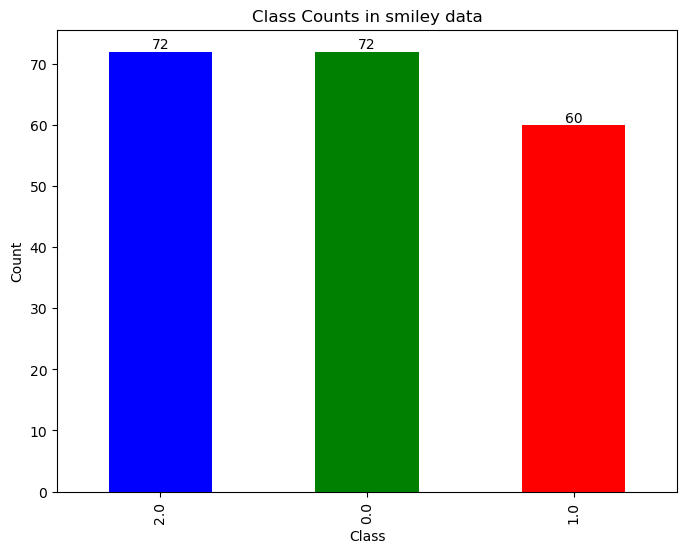

In [62]:
# Calculate the count for each class in smiley dataset
smiley_Y_class_counts = smiley_labels_df[0].value_counts()

# Print the count for each class in smiley dataset
print("smiley_Y_df class counts:")
print(smiley_Y_class_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red'] 
smiley_Y_class_counts.plot(kind='bar', color=colors)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts in smiley data")

# Add count of labels to the bars
for i, count in enumerate(smiley_Y_class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Now we will see this in a proporation with the percentage with the use pie chart.

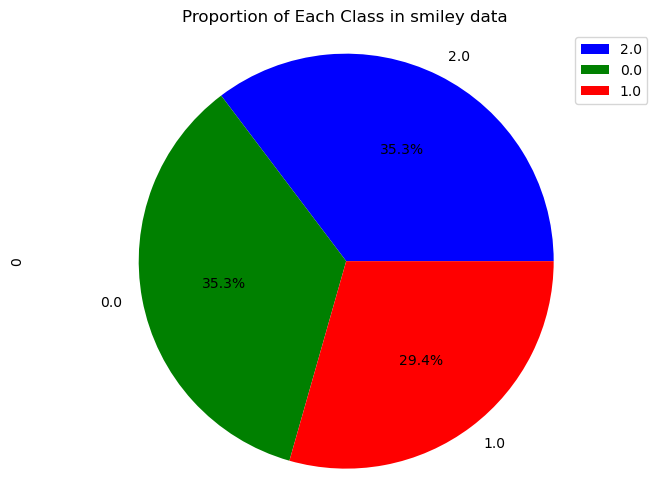

In [63]:
# Calculate the count for each class in smiley labels
smiley_Y_class_counts = smiley_labels_df[0].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  
smiley_Y_class_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%')

plt.axis('equal')  
plt.title("Proportion of Each Class in smiley data")
plt.legend(labels=smiley_Y_class_counts.index, loc='best')  

plt.show()

Same for the noisy Data

noisy_labels_df class counts:
2.0    72
0.0    72
1.0    60
Name: 0, dtype: int64


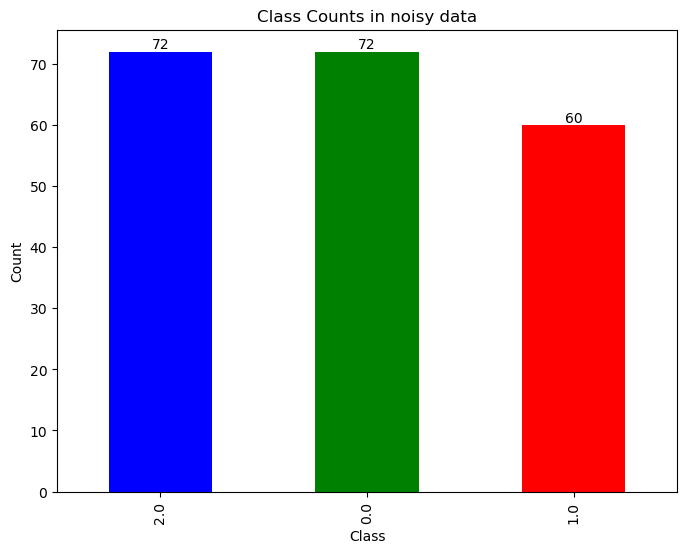

In [64]:
# Calculate the count for each class in noisy data
noisy_Y_df_counts = noisy_labels_df[0].value_counts()

# Print the count for each class in noisy data
print("noisy_labels_df class counts:")
print(noisy_Y_df_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  
noisy_Y_df_counts.plot(kind='bar', color=colors)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts in noisy data")

# Add count of labels to the bars
for i, count in enumerate(noisy_Y_df_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

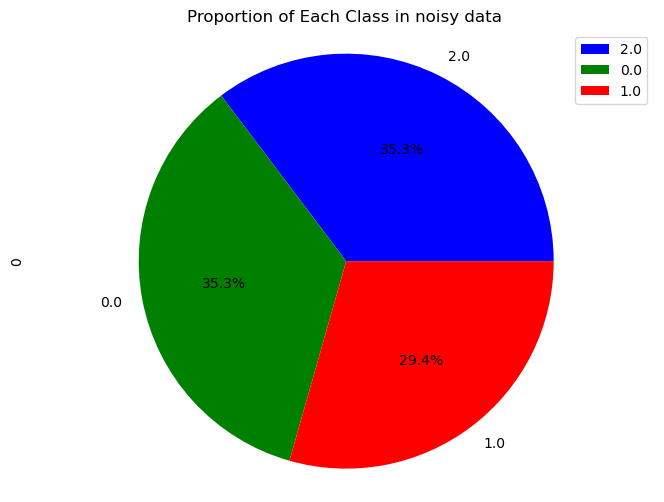

In [65]:
# Calculate the count for each class in noisy_labels_df
noisy_Y_df_counts = noisy_labels_df[0].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red'] 
noisy_Y_df_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Proportion of Each Class in noisy data")
plt.legend(labels=noisy_Y_df_counts.index, loc='best')  # Add legend

plt.show()

# Sample Image 
Displayed a few sample images from each category to get a visual understanding of what the smiley faces look like in each class

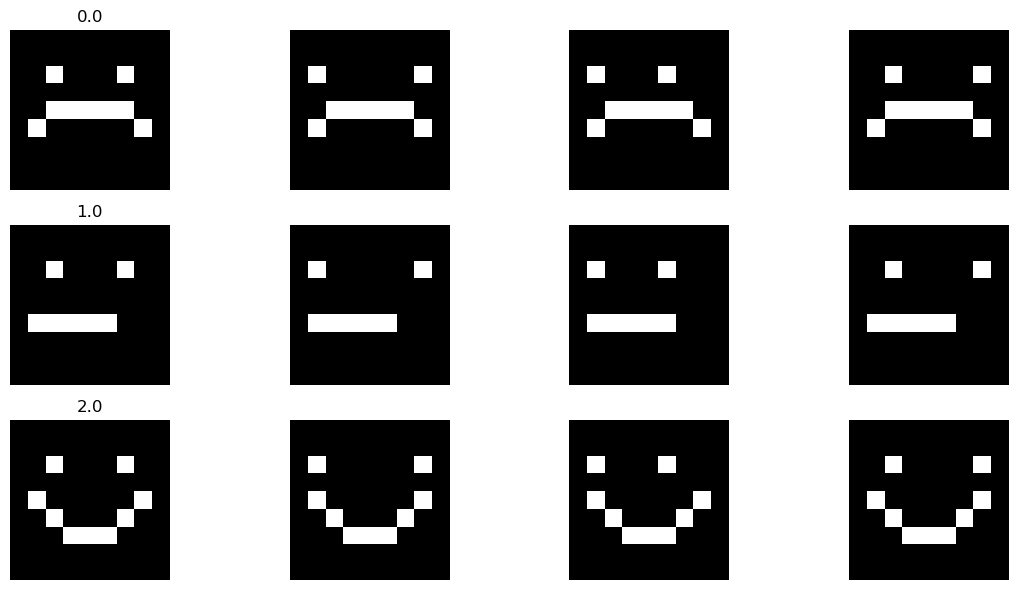

In [19]:
# print(Smiley_labels)
# Define the number of sample images to display for each category
num_samples = 4

# Creates subplots to display the sample images
fig, axes = plt.subplots(nrows=3, ncols=num_samples, figsize=(12, 6))

# Iterate over each category and plot sample images
for i, category in enumerate(np.unique(Smiley_labels)):
    category_images = Smiley_images[Smiley_labels == category]
    sample_images = category_images[:num_samples]

    # Plot sample images in the corresponding subplot
    for j, image in enumerate(sample_images):
        axes[i, j].imshow(image.squeeze(), cmap='gray')
        axes[i, j].axis('off')

    # Set the category label as the title of the subplot
    axes[i, 0].set_title(category)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


Now Some sample images of each category from the noisy data

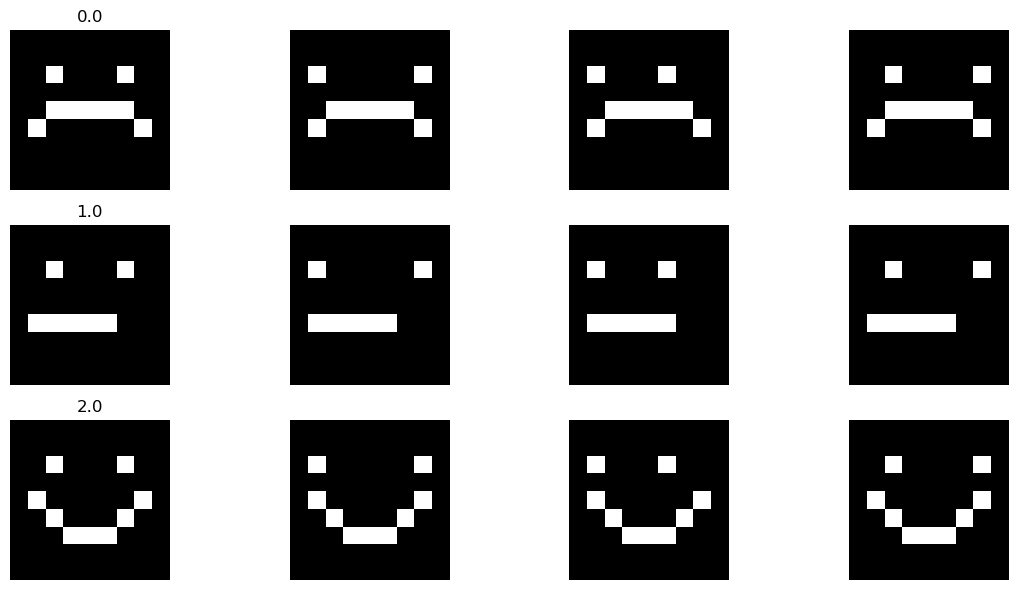

In [20]:
# print(Noisy_labels)
# Define the number of sample images to display for each category
num_samples = 4

# Creates subplots to display the sample images
fig, axes = plt.subplots(nrows=3, ncols=num_samples, figsize=(12, 6))

# Iterate over each category and plot sample images
for i, category in enumerate(np.unique(Noisy_labels)):
    category_images = Smiley_images[Noisy_labels == category]
    sample_images = category_images[:num_samples]

    # Plot sample images in the corresponding subplot
    for j, image in enumerate(sample_images):
        axes[i, j].imshow(image.squeeze(), cmap='gray')
        axes[i, j].axis('off')

    # Set the category label as the title of the subplot
    axes[i, 0].set_title(category)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


# Misssing Values
Checking for missing values involves examining a dataset to identify any instances where data is absent or incomplete. This process will help us to uncover gaps or inconsistencies in the data, which can have implications for the accuracy and reliability of subsequent data analysis or modeling tasks. By detecting and addressing missing values, we can ensure that the data used for further analysis is reliable and complete, thereby maintaining the integrity and quality of our findings.

In [21]:
# Check for missing values
print("Missing values Smiley images:", smiley_images_df.isnull().sum().sum())
print("Missing values Smiley labels:", smiley_labels_df.isnull().sum().sum())
print("Missing values Noisy images:", noisy_images_df.isnull().sum().sum())
print("Missing values Noisy labels:", noisy_labels_df.isnull().sum().sum())

Missing values Smiley images: 0
Missing values Smiley labels: 0
Missing values Noisy images: 0
Missing values Noisy labels: 0


Our Smiley faces dataset does not contains any missing values.

# Outlier Checking
After doing the checking values of missing values we have to check for the outliers that is identifying and analyzing data points that significantly deviate from the normal or expected patterns within a dataset. Outliers are observations that are unusually distant from other data points and may represent rare events, measurement errors, or anomalies

In [22]:
# Outlier detection with Isolation Forest
def detect_outliers(df):
    # Fit the Isolation Forest model
    model = IsolationForest(contamination=0.05)  
    model.fit(df)
    
    # Predict outliers
    outliers = model.predict(df)
    
    # Add outlier column to DataFrame
    df['Outlier'] = outliers
    
    return df

# Detect outliers in each DataFrame
smiley_X_outliers = detect_outliers(smiley_images_df)
smiley_Y_outliers = detect_outliers(smiley_labels_df)
noisy_X_outliers = detect_outliers(noisy_images_df)
noisy_Y_outliers = detect_outliers(noisy_labels_df)


In [23]:
outlier_indices = smiley_X_outliers.index[smiley_X_outliers['Outlier'] == -1]
if len(outlier_indices) > 0:
    print("Outliers found in smiley_X_outliers dataframe at indices:", outlier_indices)
    outlier_rows = smiley_X_outliers.loc[outlier_indices]
    print("Outlier rows in smiley_X_outliers dataframe:")
    print(outlier_rows)
else:
    print("There are no outliers in smiley_X_outliers dataframe.")


Outliers found in smiley_X_outliers dataframe at indices: Int64Index([70, 110, 113, 114, 115, 120, 176, 180, 181, 182, 188], dtype='int64')
Outlier rows in smiley_X_outliers dataframe:
       0    1    2    3    4    5    6    7    8    9  ...   72   73   74  \
70   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
110  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
113  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
114  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
115  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
120  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
176  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
180  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
181  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
182  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [24]:
outlier_indices = smiley_Y_outliers.index[smiley_Y_outliers['Outlier'] == -1]
if len(outlier_indices) > 0:
    print("Outliers found in smiley_Y_outliers dataframe at indices:", outlier_indices)
    outlier_rows = smiley_Y_outliers.loc[outlier_indices]
    print("Outlier rows in smiley_X_outliers dataframe:")
    print(outlier_rows)
else:
    print("There are no outliers in smiley_Y_outliers dataframe.")


There are no outliers in smiley_Y_outliers dataframe.


Lets check the outliers for the noisy data

In [25]:
outlier_indices = noisy_X_outliers.index[noisy_X_outliers['Outlier'] == -1]
if len(outlier_indices) > 0:
    print("Outliers found in noisy_X_outliers dataframe at indices:", outlier_indices)
    outlier_rows = noisy_X_outliers.loc[outlier_indices]
    print("Outlier rows in noisy_X_outliers dataframe:")
    print(outlier_rows)
else:
    print("There are no outliers in noisy_X_outliers dataframe.")


Outliers found in noisy_X_outliers dataframe at indices: Int64Index([68, 70, 71, 112, 113, 114, 121, 180, 181, 182, 183], dtype='int64')
Outlier rows in noisy_X_outliers dataframe:
       0    1    2    3    4    5    6    7    8    9  ...   72   73   74  \
68   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
70   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
71   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
112  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
113  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
114  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
121  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
180  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
181  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
182  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [26]:
outlier_indices = noisy_Y_outliers.index[noisy_Y_outliers['Outlier'] == -1]
if len(outlier_indices) > 0:
    print("Outliers found in noisy_Y_outliers dataframe at indices:", outlier_indices)
    outlier_rows = noisy_Y_outliers.loc[outlier_indices]
    print("Outlier rows in noisy_Y_outliers dataframe:")
    print(outlier_rows)
else:
    print("There are no outliers in noisy_Y_outliers dataframe.")


There are no outliers in noisy_Y_outliers dataframe.


Here we can see that smiley_X contains the outlier while smiley_Y does not contains any outlier same for the dataset with noise. If the outlier found is present only in the "smiley_X.npy" file and not in the corresponding "smiley_Y.npy" file, it suggests that the outlier image does not belong to any of the defined categories (sad, neutral, happy). In this case, removing the outlier image from the dataset could be a reasonable approach.

Outliers can have a significant impact on the performance of machine learning models. They may introduce noise and affect the learning process, leading to inaccurate predictions. By removing the outlier image, we can potentially improve the overall performance and accuracy of  model.

In [27]:
# Convert DataFrame to NumPy array
smiley_X_array = smiley_images_df.to_numpy()
smiley_Y_array = smiley_labels_df.to_numpy()

# Flatten the image data for Isolation Forest
smiley_X_flat = smiley_X_array.reshape(len(smiley_X_array), -1)
smiley_Y_flat = smiley_Y_array.reshape(len(smiley_Y_array), -1)

# Outlier detection with Isolation Forest
def detect_outliers(data):
    # Fit the Isolation Forest model
    model = IsolationForest(contamination=0.05)  
    model.fit(data)
    
    # Predict outliers
    outliers = model.predict(data)
    
    return outliers

# Detect outliers in smiley_X
smiley_X_outliers = detect_outliers(smiley_X_flat)

# Find outlier indices
outlier_indices = np.where(smiley_X_outliers == -1)[0]

if len(outlier_indices) > 0:
    print("Outliers found in smiley_X at indices:", outlier_indices)
    print("Outlier rows in smiley_X:")
    outlier_images = smiley_images_df.iloc[outlier_indices]
    outlier_labels = smiley_labels_df.iloc[outlier_indices]
    print(outlier_images)
    print(outlier_labels)

    # Remove outlier images and labels
    smiley_X_clean = smiley_images_df.drop(smiley_images_df.index[outlier_indices])
    smiley_Y_clean = smiley_labels_df.drop(smiley_labels_df.index[outlier_indices])
    
    # Convert smiley_X_clean back to NumPy array and remove 'Outlier' column
    smiley_X_clean = smiley_X_clean.to_numpy()
    smiley_Y_clean =smiley_Y_clean.to_numpy()
    smiley_X_clean = np.delete(smiley_X_clean, -1, axis=1)
    smiley_Y_clean = np.delete(smiley_Y_clean, -1, axis=1)
    
    print("Cleaned smiley_X shape:", smiley_X_clean.shape)
    print("Cleaned smiley_Y shape:", smiley_Y_clean.shape)
else:
    print("There are no outliers in smiley_X.")


Outliers found in smiley_X at indices: [ 70 110 113 114 115 120 176 178 180 181 182]
Outlier rows in smiley_X:
       0    1    2    3    4    5    6    7    8    9  ...   72   73   74  \
70   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
110  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
113  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
114  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
115  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
120  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
176  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
178  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
180  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
181  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
182  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

For noisy data

In [28]:
# Convert DataFrame to NumPy array
noisy_X_array = noisy_images_df.to_numpy()
noisy_Y_array = noisy_labels_df.to_numpy()

# Flatten the image data for Isolation Forest
noisy_X_flat = noisy_X_array.reshape(len(noisy_X_array), -1)
noisy_Y_flat = noisy_Y_array.reshape(len(noisy_Y_array), -1)

# Outlier detection with Isolation Forest
def detect_outliers(data):
    # Fit the Isolation Forest model
    model = IsolationForest(contamination=0.05)  
    model.fit(data)
    
    # Predict outliers
    outliers = model.predict(data)
    
    return outliers

# Detect outliers in noisy_X
noisy_X_outliers = detect_outliers(noisy_X_flat)

# Find outlier indices
outlier_indices = np.where(noisy_X_outliers == -1)[0]

if len(outlier_indices) > 0:
    print("Outliers found in noisy_X at indices:", outlier_indices)
    print("Outlier rows in noisy_X:")
    outlier_images = noisy_images_df.iloc[outlier_indices]
    outlier_labels = noisy_labels_df.iloc[outlier_indices]
    print(outlier_images)
    print(outlier_labels)

    # Remove outlier images and labels
    noisy_X_clean = noisy_images_df.drop(noisy_images_df.index[outlier_indices])
    noisy_Y_clean = noisy_labels_df.drop(noisy_labels_df.index[outlier_indices])
    
    # Convert noisy_X_clean back to NumPy array and remove 'Outlier' column
    noisy_X_clean = noisy_X_clean.to_numpy()
    noisy_Y_clean =noisy_Y_clean.to_numpy()
    noisy_X_clean = np.delete(noisy_X_clean, -1, axis=1)
    noisy_Y_clean = np.delete(noisy_Y_clean, -1, axis=1)
    
    print("Cleaned noisy_X shape:", noisy_X_clean.shape)
    print("Cleaned noisy_Y shape:", noisy_Y_clean.shape)
else:
    print("There are no outliers in noisy_X.")


Outliers found in noisy_X at indices: [ 70  71 112 113 114 124 141 180 181 182 183]
Outlier rows in noisy_X:
       0    1    2    3    4    5    6    7    8    9  ...   72   73   74  \
70   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
71   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
112  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
113  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
114  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
124  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
141  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
180  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
181  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
182  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
183  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

The preprocessing of the data is done and cleaned data is stored in smiley_X_clean and noisy_X_clean

# Check for the size of images

In [29]:
# Get the dimensions of the first image
first_image_size = smiley_X_clean[0].shape

# Check if all images have the same size
same_size = True
for image in smiley_X_clean:
    if image.shape != first_image_size:
        same_size = False
        break

if same_size:
    print("All images have the same size:")
else:
    print("Images have different sizes.")


All images have the same size:


If the output of the code indicates that "All images have the same size," it means that all the images in the smiley_X_clean array already have the same dimensions. In this case, there is no immediate need to resize the images to a consistent dimension.



Same Checking size for the noisy data also

In [30]:
# Get the dimensions of the first image
noisy_first_image_size = noisy_X_clean[0].shape

# Check if all images have the same size
same_size = True
for image in noisy_X_clean:
    if image.shape != noisy_first_image_size:
        same_size = False
        break

if same_size:
    print("All images have the same size:")
else:
    print("Images have different sizes.")

All images have the same size:


# Naïve Bayes Classifier 

The following part of the code will train a Naïve Bayes classifier using the Multinomial Naive Bayes algorithm on a smiley dataset and recorded the major matrices

Accuracy: 
Accuracy is defined as the proportion of properly predicted observations to total number of observations. The model's accuracy assesses how well it predicts both positive and negative classifications.  

Accuracy=(TP+TN)/(TP+FN) 
	

Precision:
 It is the proportion of successfully predicted positive observations to total positive predictions. Precision evaluates how well the model predicts positive classes, which is significant when false positives are expensive.
 
Precision=TP/(TP+FP)


Recall: 
This is the proportion of accurately predicted positive observations to total positive observations. When false negatives are expensive, recall evaluates how well the model can recognise positive classes.

Recall=TP/(TP+FN)


In [31]:
# Convert the data into pandas dataframes
processed_smiley_images = pd.DataFrame(smiley_X_clean)
processed_smiley_labels = pd.DataFrame(smiley_Y_clean)


# Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_smiley_images, processed_smiley_labels, test_size=0.2, random_state=42
)

# Reshape the labels using ravel()
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create an instance of the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)
y_pred_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Calculate the performance metrics
accuracy = nb_classifier.score(X_test, y_test)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the TP rate, FP rate, precision, recall, and F measure
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_pred_prob_2d = y_pred_prob.reshape(-1, 1)
roc_area = roc_auc_score(y_test_bin, y_pred_prob_2d)

# Print the results and conclusions
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)
print("ROC Area:", roc_area)

Accuracy: 0.8205128205128205
Confusion Matrix:
 [[ 5  6  0]
 [ 0  9  1]
 [ 0  0 18]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.45      0.62        11
         1.0       0.60      0.90      0.72        10
         2.0       0.95      1.00      0.97        18

    accuracy                           0.82        39
   macro avg       0.85      0.78      0.77        39
weighted avg       0.87      0.82      0.81        39

ROC Area: 0.5194805194805194



After running the Naïve Bayes Classifier on our chosen dataset,Output are:

Accuracy: The classifier's overall performance was around 82.05%. This means that it made correct predictions for roughly 82% of the instances.

Confusion Matrix: The confusion matrix provides a detailed breakdown of the classifier's predictions for each class. We have three classes in our dataset: 0.0, 1.0, and 2.0. Looking at the confusion matrix, we see the following:
   - For class 0.0: The classifier correctly predicted 5 instances as 0.0, but it mistakenly classified 6 instances as 1.0.
   - For class 1.0: The classifier accurately predicted 9 instances as 1.0, but it misclassified 1 instance as 2.0.
   - For class 2.0: All 18 instances of class 2.0 were correctly classified.

Precision: Precision tells us the accuracy of the positive predictions made by the classifier. For classes 0.0, 1.0, and 2.0, the precision values are approximately 1.00, 0.60, and 0.95, respectively. This means that the classifier was highly accurate for classes 0.0 and 2.0, but not as much for class 1.0.

Recall: Recall, also known as the True Positive Rate or Sensitivity, measures the ability of the classifier to identify all the positive instances. For classes 0.0, 1.0, and 2.0, the recall values are approximately 0.45, 0.90, and 1.00, respectively. The classifier had high recall for classes 1.0 and 2.0, but it struggled in identifying instances of class 0.0.

F1-score: The F1-score is a balance between precision and recall. It gives us a combined measure of accuracy for each class. The F1-scores for classes 0.0, 1.0, and 2.0 are approximately 0.62, 0.72, and 0.97, respectively. Class 2.0 has the highest F1-score, indicating a well-balanced precision and recall for this class.

ROC Area: The ROC area measures the classifier's ability to distinguish between different classes. In this case, the ROC area is approximately 0.52, suggesting that the classifier's performance in distinguishing between classes is not very strong.

In conclusion, the Naïve Bayes Classifier performed reasonably well with good accuracy and F1-scores for most classes. However, it had some difficulty with class 0.0, as indicated by the low recall and F1-score. The classifier's ability to differentiate between classes, as measured by the ROC area, was not very strong overall. 

In [49]:
# Convert the data into pandas dataframes
processed_noisy_images = pd.DataFrame(noisy_X_clean)
processed_noisy_labels = pd.DataFrame(noisy_Y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_noisy_images, processed_noisy_labels, test_size=0.2, random_state=42
)

# Reshape the labels using ravel()
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create an instance of the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)
y_pred_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Calculate the performance metrics
accuracy = nb_classifier.score(X_test, y_test)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the TP rate, FP rate, precision, recall, and F measure
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_pred_prob_2d = y_pred_prob.reshape(-1, 1)
roc_area = roc_auc_score(y_test_bin, y_pred_prob_2d)

# Print the results and conclusions
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)
print("ROC Area:", roc_area)

Accuracy: 0.7948717948717948
Confusion Matrix:
 [[ 8  3  0]
 [ 2  7  1]
 [ 0  2 16]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.58      0.70      0.64        10
         2.0       0.94      0.89      0.91        18

    accuracy                           0.79        39
   macro avg       0.77      0.77      0.77        39
weighted avg       0.81      0.79      0.80        39

ROC Area: 0.4285714285714285


# Conclusion

The Multinomial Naive Bayes classifier achieved an accuracy of around 79.5%, indicating relatively good overall performance.  For class 0.0, it correctly predicted 8 samples, wrongly classified 3 samples as class 1, and made no false predictions for class 2.
For class 1.0, it correctly predicted 7 samples, misclassified 2 samples as class 0, and 1 sample as class 2.
For class 2.0, it correctly predicted 16 samples, misclassified 2 samples as class 1, and made no false predictions for class 0.

The classification report provides precision, recall, F1-score, and support for each class label.
Precision indicates how often the classifier correctly identified the positive samples. For class 0.0, precision is 80%, for class 1.0, it is 58%, and for class 2.0, it is 94%.
Recall (sensitivity) shows how well the classifier finds all positive samples. For class 0.0, recall is 73%, for class 1.0, it's 70%, and for class 2.0, it's 89%.
The F1-score balances precision and recall. For class 0.0, it's 76%, for class 1.0, 64%, and for class 2.0, it's 91%.
Support will represents the number of samples in each class.
The classifier showed the overall accurcy and some challenges in correctly identifying samples from class 1.0 and had a relatively low ROC area.

In comparison, the model trained on Smiley Data performs better overall with an accuracy of 84.62% compared to the model trained on Data with Noisy Data, which achieved an accuracy of 79.5%. The Smiley Data model shows higher precision and recall for happy faces but struggles with sad faces. On the other hand, the Noisy Data model has challenges correctly identifying neutral faces. Both models could benefit from further fine-tuning and exploration of different algorithms or preprocessing techniques to improve classification results for all classes.

# Most Corealting Feature

In [29]:
# Convert the data to pandas DataFrame
processed_smiley_images = pd.DataFrame(smiley_X_clean)
processed_smiley_labels = pd.DataFrame(smiley_Y_clean)

# Calculate the correlation between features and classes
correlation_matrix = processed_smiley_images.corrwith(processed_smiley_labels[0])

# Split the correlation matrix by class labels
correlation_by_class = {}
for class_label in processed_smiley_labels[0].unique():
    correlation_by_class[class_label] = correlation_matrix[
        processed_smiley_labels[0] == class_label
    ]

# Sort features within each class based on correlation
top_features_by_class = {}
for class_label, correlation_values in correlation_by_class.items():
    top_features = correlation_values.abs().nlargest(6).index
    top_features_by_class[class_label] = top_features
    print(f"Top features for class {class_label}:")
    print(top_features.tolist())

# Overall top features
overall_top_features = correlation_matrix.abs().nlargest(6).index
print("\nTop features overall:")
print(overall_top_features.tolist())

# Create dataset 1 with 3 top features for each class
dataset1_features = []
for class_label, top_features in top_features_by_class.items():
    dataset1_features.extend(top_features[:3])
dataset1 = processed_smiley_images[dataset1_features]

# Create dataset 2 with 6 top features for each class
dataset2_features = []
for class_label, top_features in top_features_by_class.items():
    dataset2_features.extend(top_features[:6])
dataset2 = processed_smiley_images[dataset2_features]

# Train and evaluate Naïve Bayes classifier on dataset 1
nb1 = GaussianNB()
nb1.fit(dataset1, processed_smiley_labels.values.ravel())
predictions1 = nb1.predict(dataset1)
print("\nPerformance Metrics - Dataset 1:")
print("Accuracy:", accuracy_score(processed_smiley_labels, predictions1))
print("Precision:", precision_score(processed_smiley_labels, predictions1, average='macro'))
print("Recall:", recall_score(processed_smiley_labels, predictions1, average='macro'))
print("F1-Score:", f1_score(processed_smiley_labels, predictions1, average='macro'))

# Train and evaluate Naïve Bayes classifier on dataset 2
nb2 = GaussianNB()
nb2.fit(dataset2, processed_smiley_labels.values.ravel())
predictions2 = nb2.predict(dataset2)
print("\nPerformance Metrics - Dataset 2:")
print("Accuracy:", accuracy_score(processed_smiley_labels, predictions2))
print("Precision:", precision_score(processed_smiley_labels, predictions2, average='macro'))
print("Recall:", recall_score(processed_smiley_labels, predictions2, average='macro'))
print("F1-Score:", f1_score(processed_smiley_labels, predictions2, average='macro'))


Top features for class 2.0:
[68, 70, 7, 79, 10, 72]
Top features for class 1.0:
[39, 40, 41, 37, 43, 38]
Top features for class 0.0:
[66, 57, 58, 59, 67, 61]

Top features overall:
[39, 40, 41, 66, 68, 57]

Performance Metrics - Dataset 1:
Accuracy: 0.5958549222797928
Precision: 0.8088235294117648
Recall: 0.6152832674571805
F1-Score: 0.5951460481099656

Performance Metrics - Dataset 2:
Accuracy: 0.7564766839378239
Precision: 0.8507936507936508
Recall: 0.7676767676767676
F1-Score: 0.7631447398318564


Lets perform the same task with our noisy data

In [30]:
# Convert the data into pandas dataframes
processed_noisy_images = pd.DataFrame(noisy_X_clean)
processed_noisy_labels = pd.DataFrame(noisy_Y_clean)

# Calculate the correlation between features and classes
correlation_matrix = processed_noisy_images.corrwith(processed_noisy_labels[0])

# Split the correlation matrix by class labels
correlation_by_class = {}
for class_label in processed_noisy_labels[0].unique():
    correlation_by_class[class_label] = correlation_matrix[
        processed_noisy_labels[0] == class_label
    ]

# Sort features within each class based on correlation
top_features_by_class = {}
for class_label, correlation_values in correlation_by_class.items():
    top_features = correlation_values.abs().nlargest(6).index
    top_features_by_class[class_label] = top_features
    print(f"Top features for class {class_label}:")
    print(top_features.tolist())

# Overall top features
overall_top_features = correlation_matrix.abs().nlargest(6).index
print("\nTop features overall:")
print(overall_top_features.tolist())

# Create dataset 1 with 3 top features for each class
dataset1_features = []
for class_label, top_features in top_features_by_class.items():
    dataset1_features.extend(top_features[:3])
dataset1 = processed_noisy_images[dataset1_features]

# Create dataset 2 with 6 top features for each class
dataset2_features = []
for class_label, top_features in top_features_by_class.items():
    dataset2_features.extend(top_features[:6])
dataset2 = processed_noisy_images[dataset2_features]

# Train and evaluate Naïve Bayes classifier on dataset 1
nb1 = GaussianNB()
nb1.fit(dataset1, processed_noisy_labels.values.ravel())
predictions1 = nb1.predict(dataset1)
print("\nPerformance Metrics - Dataset 1:")
print("Accuracy:", accuracy_score(processed_noisy_labels, predictions1))
print("Precision:", precision_score(processed_noisy_labels, predictions1, average='macro'))
print("Recall:", recall_score(processed_noisy_labels, predictions1, average='macro'))
print("F1-Score:", f1_score(processed_noisy_labels, predictions1, average='macro'))

# Train and evaluate Naïve Bayes classifier on dataset 2
nb2 = GaussianNB()
nb2.fit(dataset2, processed_noisy_labels.values.ravel())
predictions2 = nb2.predict(dataset2)
print("\nPerformance Metrics - Dataset 2:")
print("Accuracy:", accuracy_score(processed_noisy_labels, predictions2))
print("Precision:", precision_score(processed_noisy_labels, predictions2, average='macro'))
print("Recall:", recall_score(processed_noisy_labels, predictions2, average='macro'))
print("F1-Score:", f1_score(processed_noisy_labels, predictions2, average='macro'))


Top features for class 2.0:
[68, 67, 70, 6, 14, 12]
Top features for class 1.0:
[39, 41, 40, 37, 43, 42]
Top features for class 0.0:
[57, 58, 59, 66, 61, 55]

Top features overall:
[39, 41, 40, 57, 58, 68]

Performance Metrics - Dataset 1:
Accuracy: 0.5803108808290155
Precision: 0.6641787176696211
Recall: 0.5895931142410016
F1-Score: 0.5553825331302111

Performance Metrics - Dataset 2:
Accuracy: 0.7875647668393783
Precision: 0.86
Recall: 0.7945630773890656
F1-Score: 0.7929883248065067


The analysis which we have performed gives the valuable information about the dataset, feature importance, and the effect of feature reduction on model performance. It demonstrated the importance of thoughtful feature selection and understanding the data characteristics to build effective classifiers. 

# Part 2

# Clustering

To perform the clustering on smiley data we are going to experiment various clustering algorithms and will check for accuracy by which we will know which type of clustering is performing well to group together similar data. 

Firstly we will explore the clustering algorithms with the number of clusters 3.

# The k-means Clustering

In [234]:
# Performs k-means clustering
number_clusters = 3
kmeansclustering_model = KMeans(n_clusters=number_clusters, random_state=42)
kmeansclustering_model.fit(processed_smiley_images)

# Gets the predicted cluster labels
predictedkmeans_clusters = kmeans_model.labels_

# Evaluates the accuracy of clustering 
clustering_accuracy = accuracy_score(processed_smiley_labels.values.ravel(), predictedkmeans_clusters)
print("K-means Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


K-means Clustering Accuracy: 40.93%


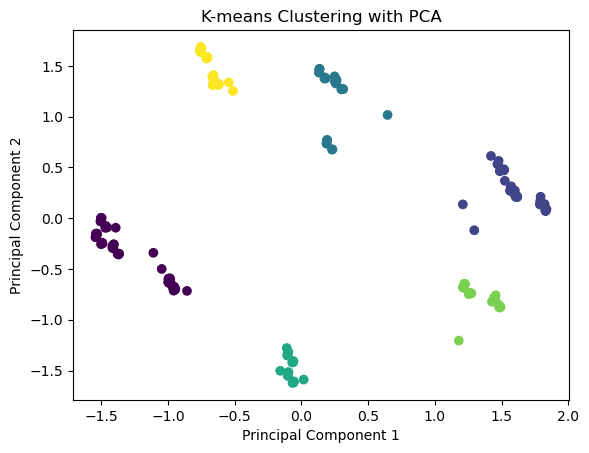

In [235]:
# Performs PCA for dimensionality reduction
pca_model = PCA(n_components=2)
pca_reduced_data = pca_model.fit_transform(processed_smiley_images)

# Initialize the KMeans clustering algorithm with the desired number of clusters
number_clusters = 3
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fits the reduced features to the KMeans model and obtain the cluster labels
kmeans_model.fit(pca_reduced_data)
cluster_labels = kmeans_model.labels_

# Create a scatter plot of the reduced features colored by the cluster labels
plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()


Performing the k-means clusering on the noisy data

In [236]:
# Perform k-means clustering
number_clusters = 3
kmeansclustering_model = KMeans(n_clusters=number_clusters, random_state=42)
kmeansclustering_model.fit(processed_noisy_images)

# Get predicted cluster labels
predictedkmeans_clusters = kmeans_model.labels_

# Evaluate the accuracy of clustering 
clustering_accuracy = accuracy_score(processed_noisy_labels.values.ravel(), predictedkmeans_clusters)
print("K-means Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


K-means Clustering Accuracy: 28.50%


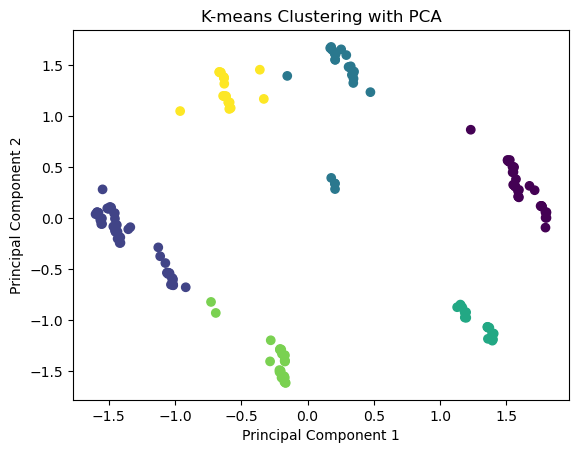

In [237]:
# Perform PCA for dimensionality reduction
pca_model = PCA(n_components=2)
pca_reduced_data = pca_model.fit_transform(processed_noisy_images)

# Initialize the KMeans clustering algorithm with the desired number of clusters
number_clusters = 3
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the reduced features to the KMeans model and obtain the cluster labels
kmeans_model.fit(pca_reduced_data)
cluster_labels = kmeans_model.labels_

# Create a scatter plot of the reduced features colored by the cluster labels
plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()


The accuracy we obtained from the k-means clustering for the smiley data  and noisy is about 40%. This accuracy shows how well the k-means algorithm tried to group the data points into the correct categories based on the actual labels we already knew (0 for sad, 1 for neutral, and 2 for happy). A low accuracy suggests that the k-means algorithm might not be the best choice for this specific dataset, or it could mean that the data doesn't have very distinct and well-separated groups.

In the scatter plot visualization, we can notice three different groups on the plot that correspond to the three classes (happy, neutral, and sad). This means that the k-means algorithm was able to find some level of separation among the data points, leading to three distinct clusters when we displayed the data in a 2D space using PCA. However, because the accuracy is relatively low, it indicates that the clustering might not perfectly match the actual classes of the smiley faces.

# GMM Clustering

In [148]:
# Convert DataFrame to NumPy array
processed_smiley_images_array = processed_smiley_images.to_numpy()

# Set the number of clusters 
number_clusters = 3

# Instantiate and fit the Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=number_clusters, random_state=0)
gmm_model.fit(processed_smiley_images_array)

# Obtain the predicted cluster labels
predictedgmm_clusters = gmm_model.predict(processed_smiley_images_array)

# Evaluate accuracy (optional if ground truth labels are available)
clustering_accuracy = accuracy_score(processed_smiley_labels, predictedgmm_clusters)
print("GMM Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


GMM Clustering Accuracy: 33.16%


For the noisy data

In [149]:
# Convert DataFrame to NumPy array
processed_noisy_images_array = processed_noisy_images.to_numpy()

# Set the number of clusters 
number_clusters = 3

# Instantiate and fit the Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=number_clusters, random_state=0)
gmm_model.fit(processed_noisy_images_array)

# Obtain the predicted cluster labels
predictedgmm_clusters = gmm_model.predict(processed_noisy_images_array)

# Evaluate accuracy (optional if ground truth labels are available)
clustering_accuracy = accuracy_score(processed_noisy_labels, predictedgmm_clusters)
print("GMM Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

GMM Clustering Accuracy: 30.57%


# Agglomerative Hierarchical Clustering

In [150]:
# Initialize the AgglomerativeClustering model
number_clusters = 3  
linkage_type = 'ward'  
agg_clustering_model = AgglomerativeClustering(n_clusters=number_clusters, linkage=linkage_type)

# Fit the model to data
predicted_labels = agg_clustering_model.fit_predict(processed_smiley_images)

# Compute the silhouette score
silhouette_avg = silhouette_score(processed_smiley_images, predicted_labels)
print("Accuracy Score: {:.2f}%".format(silhouette_avg * 100))


Accuracy Score: 23.89%


Agglomerative Hierarchical Clustering for noisy data

In [151]:
# Initialize the AgglomerativeClustering model
number_clusters = 3  
linkage_type = 'ward'  
agg_clustering_model = AgglomerativeClustering(n_clusters=number_clusters, linkage=linkage_type)

# Fit the model to  data
predicted_labels = agg_clustering_model.fit_predict(processed_noisy_images)

# Compute the silhouette score
silhouette_avg = silhouette_score(processed_noisy_images, predicted_labels)
print("Accuracy Score: {:.2f}%".format(silhouette_avg * 100))

Accuracy Score: 22.74%


# Single Linkage

In [158]:
# Preprocess the data if needed (e.g., scaling)
scaled_smiley_data = preprocessing.scale(processed_smiley_images)

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
reduced_smiley_data = pca.fit_transform(scaled_smiley_data)

# Set the number of clusters
num_clusters = 3

# Perform hierarchical clustering using Single Linkage
linkage_matrix = linkage(reduced_smiley_data, method='single')

# Obtain the cluster assignments
predicted_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assuming  ground truth labels available
true_labels = processed_smiley_labels.values.flatten()

# Compute accuracy
clustering_accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


Clustering Accuracy: 6.22%


In [160]:
# Preprocess the data if needed (e.g., scaling)
scaled_noisy_data = preprocessing.scale(processed_noisy_images)

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
reduced_noisy_data = pca.fit_transform(scaled_noisy_data)

# Set the number of clusters
num_clusters = 3

# Perform hierarchical clustering using Single Linkage
linkage_matrix = linkage(reduced_noisy_data, method='single')

# Obtain the cluster assignments
predicted_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assuming  ground truth labels available
true_labels = processed_noisy_labels.values.flatten()

# Compute accuracy
clustering_accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

Clustering Accuracy: 31.09%


# DBSCAN Clustering

In [154]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan.fit(processed_smiley_images)
predicted_labels = dbscan.labels_
true_labels = processed_smiley_labels.values.flatten()  # Flatten the ground truth labels

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 0.00%


In [155]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  
dbscan_model.fit(processed_noisy_images)
predicted_cluster_labels = dbscan_model.labels_
true_labels = processed_noisy_labels.values.flatten()  # Flatten the ground truth labels

accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(accuracy * 100))


Clustering Accuracy: 0.00%


# 2nd exp

Lets check with number of clusters 4

# k-means Clustering

In [161]:
# Performs k-means clustering
number_clusters = 4
kmeansclustering_model = KMeans(n_clusters=number_clusters, random_state=42)
kmeansclustering_model.fit(processed_smiley_images)

# Gets the predicted cluster labels
predictedkmeans_clusters = kmeans_model.labels_

# Evaluates the accuracy of clustering 
clustering_accuracy = accuracy_score(processed_smiley_labels.values.ravel(), predictedkmeans_clusters)
print("K-means Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

K-means Clustering Accuracy: 28.50%


For noisy Data

In [162]:
# Perform k-means clustering
number_clusters = 4
kmeansclustering_model = KMeans(n_clusters=number_clusters, random_state=42)
kmeansclustering_model.fit(processed_noisy_images)

# Get predicted cluster labels
predictedkmeans_clusters = kmeans_model.labels_

# Evaluate the accuracy of clustering 
clustering_accuracy = accuracy_score(processed_noisy_labels.values.ravel(), predictedkmeans_clusters)
print("K-means Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

K-means Clustering Accuracy: 29.53%


# GMM Clustering

In [163]:
# Convert DataFrame to NumPy array
processed_smiley_images_array = processed_smiley_images.to_numpy()

# Set the number of clusters 
number_clusters = 4

# Instantiate and fit the Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=number_clusters, random_state=0)
gmm_model.fit(processed_smiley_images_array)

# Obtain the predicted cluster labels
predictedgmm_clusters = gmm_model.predict(processed_smiley_images_array)

# Evaluate accuracy (optional if ground truth labels are available)
clustering_accuracy = accuracy_score(processed_smiley_labels, predictedgmm_clusters)
print("GMM Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


GMM Clustering Accuracy: 20.73%


GMM Clustering for the noisy data

In [164]:
# Convert DataFrame to NumPy array
processed_noisy_images_array = processed_noisy_images.to_numpy()

# Set the number of clusters 
number_clusters = 4

# Instantiate and fit the Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=number_clusters, random_state=0)
gmm_model.fit(processed_noisy_images_array)

# Obtain the predicted cluster labels
predictedgmm_clusters = gmm_model.predict(processed_noisy_images_array)

# Evaluate accuracy (optional if ground truth labels are available)
clustering_accuracy = accuracy_score(processed_noisy_labels, predictedgmm_clusters)
print("GMM Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

GMM Clustering Accuracy: 18.65%


# Agglomerative Hierarchical Clustering

In [165]:
# Initialize the AgglomerativeClustering model
number_clusters = 4 
linkage_type = 'ward'  
agg_clustering_model = AgglomerativeClustering(n_clusters=number_clusters, linkage=linkage_type)

# Fit the model to data
predicted_labels = agg_clustering_model.fit_predict(processed_smiley_images)

# Compute the silhouette score
silhouette_avg = silhouette_score(processed_smiley_images, predicted_labels)
print("Accuracy Score: {:.2f}%".format(silhouette_avg * 100))

Accuracy Score: 27.34%


Agglomerative Hierarchical Clustering for noisy data

In [166]:
# Initialize the AgglomerativeClustering model
number_clusters = 4  
linkage_type = 'ward'  
agg_clustering_model = AgglomerativeClustering(n_clusters=number_clusters, linkage=linkage_type)

# Fit the model to data
predicted_labels = agg_clustering_model.fit_predict(processed_noisy_images)

# Compute the silhouette score
silhouette_avg = silhouette_score(processed_noisy_images, predicted_labels)
print("Accuracy Score: {:.2f}%".format(silhouette_avg * 100))

Accuracy Score: 26.11%


# Single Linkagae

In [167]:
# Preprocess the data if needed (e.g., scaling)
scaled_smiley_data = preprocessing.scale(processed_smiley_images)

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
reduced_smiley_data = pca.fit_transform(scaled_smiley_data)

# Set the number of clusters
num_clusters = 4

# Perform hierarchical clustering using Single Linkage
linkage_matrix = linkage(reduced_smiley_data, method='single')

# Obtain the cluster assignments
predicted_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assuming  ground truth labels available
true_labels = processed_smiley_labels.values.flatten()

# Compute accuracy
clustering_accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


Clustering Accuracy: 6.22%


In [168]:
# Preprocess the data if needed (e.g., scaling)
scaled_noisy_data = preprocessing.scale(processed_noisy_images)

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
reduced_noisy_data = pca.fit_transform(scaled_noisy_data)

# Set the number of clusters
num_clusters = 4

# Perform hierarchical clustering using Single Linkage
linkage_matrix = linkage(reduced_noisy_data, method='single')

# Obtain the cluster assignments
predicted_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assuming  ground truth labels available
true_labels = processed_noisy_labels.values.flatten()

# Compute accuracy
clustering_accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

Clustering Accuracy: 31.09%


# 3rd Exp

Lets check with the number of clusters = 5

# k-means Clustering

In [169]:
# Performs k-means clustering
number_clusters =5
kmeansclustering_model = KMeans(n_clusters=number_clusters, random_state=42)
kmeansclustering_model.fit(processed_smiley_images)

# Gets the predicted cluster labels
predictedkmeans_clusters = kmeans_model.labels_

# Evaluates the accuracy of clustering 
clustering_accuracy = accuracy_score(processed_smiley_labels.values.ravel(), predictedkmeans_clusters)
print("K-means Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

K-means Clustering Accuracy: 28.50%


For noisy Data

In [170]:
# Perform k-means clustering
number_clusters = 5
kmeansclustering_model = KMeans(n_clusters=number_clusters, random_state=42)
kmeansclustering_model.fit(processed_noisy_images)

# Get predicted cluster labels
predictedkmeans_clusters = kmeans_model.labels_

# Evaluate the accuracy of clustering 
clustering_accuracy = accuracy_score(processed_noisy_labels.values.ravel(), predictedkmeans_clusters)
print("K-means Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

K-means Clustering Accuracy: 29.53%


# GMM Clustering

In [171]:
# Convert DataFrame to NumPy array
processed_smiley_images_array = processed_smiley_images.to_numpy()

# Set the number of clusters 
number_clusters = 5

# Instantiate and fit the Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=number_clusters, random_state=0)
gmm_model.fit(processed_smiley_images_array)

# Obtain the predicted cluster labels
predictedgmm_clusters = gmm_model.predict(processed_smiley_images_array)

# Evaluate accuracy (optional if ground truth labels are available)
clustering_accuracy = accuracy_score(processed_smiley_labels, predictedgmm_clusters)
print("GMM Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


GMM Clustering Accuracy: 20.73%


GMM Clustering for the noisy data

In [172]:
# Convert DataFrame to NumPy array
processed_noisy_images_array = processed_noisy_images.to_numpy()

# Set the number of clusters 
number_clusters = 5

# Instantiate and fit the Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=number_clusters, random_state=0)
gmm_model.fit(processed_noisy_images_array)

# Obtain the predicted cluster labels
predictedgmm_clusters = gmm_model.predict(processed_noisy_images_array)

# Evaluate accuracy (optional if ground truth labels are available)
clustering_accuracy = accuracy_score(processed_noisy_labels, predictedgmm_clusters)
print("GMM Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

GMM Clustering Accuracy: 9.33%


# Agglomerative Hierarchical Clustering

In [173]:
# Initialize the AgglomerativeClustering model
number_clusters = 5 
linkage_type = 'ward'  
agg_clustering_model = AgglomerativeClustering(n_clusters=number_clusters, linkage=linkage_type)

# Fit the model to data
predicted_labels = agg_clustering_model.fit_predict(processed_smiley_images)

# Compute the silhouette score
silhouette_avg = silhouette_score(processed_smiley_images, predicted_labels)
print("Accuracy Score: {:.2f}%".format(silhouette_avg * 100))

Accuracy Score: 25.81%


Agglomerative Hierarchical Clustering for noisy data

In [174]:
# Initialize the AgglomerativeClustering model
number_clusters = 5  
linkage_type = 'ward'  
agg_clustering_model = AgglomerativeClustering(n_clusters=number_clusters, linkage=linkage_type)

# Fit the model to data
predicted_labels = agg_clustering_model.fit_predict(processed_noisy_images)

# Compute the silhouette score
silhouette_avg = silhouette_score(processed_noisy_images, predicted_labels)
print("Accuracy Score: {:.2f}%".format(silhouette_avg * 100))

Accuracy Score: 26.74%


# Single Linkagae

In [175]:
# Preprocess the data if needed (e.g., scaling)
scaled_smiley_data = preprocessing.scale(processed_smiley_images)

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
reduced_smiley_data = pca.fit_transform(scaled_smiley_data)

# Set the number of clusters
num_clusters = 5

# Perform hierarchical clustering using Single Linkage
linkage_matrix = linkage(reduced_smiley_data, method='single')

# Obtain the cluster assignments
predicted_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assuming  ground truth labels available
true_labels = processed_smiley_labels.values.flatten()

# Compute accuracy
clustering_accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


Clustering Accuracy: 6.22%


In [176]:
# Preprocess the data if needed (e.g., scaling)
scaled_noisy_data = preprocessing.scale(processed_noisy_images)

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
reduced_noisy_data = pca.fit_transform(scaled_noisy_data)

# Set the number of clusters
num_clusters = 5

# Perform hierarchical clustering using Single Linkage
linkage_matrix = linkage(reduced_noisy_data, method='single')

# Obtain the cluster assignments
predicted_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assuming  ground truth labels available
true_labels = processed_noisy_labels.values.flatten()

# Compute accuracy
clustering_accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

Clustering Accuracy: 6.22%


# 4Th Exp

Lets check clustering on the data with the number of clusters is 6

# k-means Clustering

In [177]:
# Performs k-means clustering
number_clusters = 6
kmeansclustering_model = KMeans(n_clusters=number_clusters, random_state=42)
kmeansclustering_model.fit(processed_smiley_images)

# Gets the predicted cluster labels
predictedkmeans_clusters = kmeans_model.labels_

# Evaluates the accuracy of clustering 
clustering_accuracy = accuracy_score(processed_smiley_labels.values.ravel(), predictedkmeans_clusters)
print("K-means Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

K-means Clustering Accuracy: 28.50%


For noisy Data

In [130]:
# Perform k-means clustering
number_clusters = 6
kmeansclustering_model = KMeans(n_clusters=number_clusters, random_state=42)
kmeansclustering_model.fit(processed_noisy_images)

# Get predicted cluster labels
predictedkmeans_clusters = kmeans_model.labels_

# Evaluate the accuracy of clustering 
clustering_accuracy = accuracy_score(processed_noisy_labels.values.ravel(), predictedkmeans_clusters)
print("K-means Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

K-means Clustering Accuracy: 30.57%


# GMM Clustering

In [178]:
# Convert DataFrame to NumPy array
processed_smiley_images_array = processed_smiley_images.to_numpy()

# Set the number of clusters 
number_clusters =6

# Instantiate and fit the Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=number_clusters, random_state=0)
gmm_model.fit(processed_smiley_images_array)

# Obtain the predicted cluster labels
predictedgmm_clusters = gmm_model.predict(processed_smiley_images_array)

# Evaluate accuracy (optional if ground truth labels are available)
clustering_accuracy = accuracy_score(processed_smiley_labels, predictedgmm_clusters)
print("GMM Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


GMM Clustering Accuracy: 14.51%


GMM Clustering for the noisy data

In [179]:
# Convert DataFrame to NumPy array
processed_noisy_images_array = processed_noisy_images.to_numpy()

# Set the number of clusters 
number_clusters = 6

# Instantiate and fit the Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=number_clusters, random_state=0)
gmm_model.fit(processed_noisy_images_array)

# Obtain the predicted cluster labels
predictedgmm_clusters = gmm_model.predict(processed_noisy_images_array)

# Evaluate accuracy (optional if ground truth labels are available)
clustering_accuracy = accuracy_score(processed_noisy_labels, predictedgmm_clusters)
print("GMM Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

GMM Clustering Accuracy: 9.33%


# Agglomerative Hierarchical Clustering

In [180]:
# Initialize the AgglomerativeClustering model
number_clusters = 6 
linkage_type = 'ward'  
agg_clustering_model = AgglomerativeClustering(n_clusters=number_clusters, linkage=linkage_type)

# Fit the model to  data
predicted_labels = agg_clustering_model.fit_predict(processed_smiley_images)

# Compute the silhouette score
silhouette_avg = silhouette_score(processed_smiley_images, predicted_labels)
print("Accuracy Score: {:.2f}%".format(silhouette_avg * 100))

Accuracy Score: 27.53%


Agglomerative Hierarchical Clustering for noisy data

In [181]:
# Initialize the AgglomerativeClustering model
number_clusters =6  
linkage_type = 'ward'  
agg_clustering_model = AgglomerativeClustering(n_clusters=number_clusters, linkage=linkage_type)

# Fit the model to  data
predicted_labels = agg_clustering_model.fit_predict(processed_noisy_images)

# Compute the silhouette score
silhouette_avg = silhouette_score(processed_noisy_images, predicted_labels)
print("Accuracy Score: {:.2f}%".format(silhouette_avg * 100))

Accuracy Score: 27.27%


# Single Linkagae

In [182]:
# Preprocess the data if needed (e.g., scaling)
scaled_smiley_data = preprocessing.scale(processed_smiley_images)

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
reduced_smiley_data = pca.fit_transform(scaled_smiley_data)

# Set the number of clusters
num_clusters = 6

# Perform hierarchical clustering using Single Linkage
linkage_matrix = linkage(reduced_smiley_data, method='single')

# Obtain the cluster assignments
predicted_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assuming  ground truth labels available
true_labels = processed_smiley_labels.values.flatten()

# Compute accuracy
clustering_accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))


Clustering Accuracy: 6.22%


In [183]:
# Preprocess the data if needed (e.g., scaling)
scaled_noisy_data = preprocessing.scale(processed_noisy_images)

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
reduced_noisy_data = pca.fit_transform(scaled_noisy_data)

# Set the number of clusters
num_clusters = 6

# Perform hierarchical clustering using Single Linkage
linkage_matrix = linkage(reduced_noisy_data, method='single')

# Obtain the cluster assignments
predicted_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assuming  ground truth labels available
true_labels = processed_noisy_labels.values.flatten()

# Compute accuracy
clustering_accuracy = accuracy_score(true_labels, predicted_cluster_labels)
print("Clustering Accuracy: {:.2f}%".format(clustering_accuracy * 100))

Clustering Accuracy: 6.22%


In conclusion, the k-means clustering algorithm demonstrated an accuracy range of 28% to 30%. Conversely, the Gaussian Mixture Model (GMM) clustering exhibited a decline in accuracy as the number of clusters increased.

Subsequently, the exploration of Agglomerative Hierarchical Clustering revealed that increasing the number of clusters resulted in improved accuracy.

On the other hand, the DBSCAN algorithm performed poorly in the initial experiment with 3 clusters, achieving 0% accuracy, leading to its exclusion from further experiments. 

Following that, the Single Linkage algorithm produced varying results, with accuracy rates of either 31% or 6%.

These experiments highlighted the time-consuming nature of manually testing different algorithms and cluster numbers. To streamline the process, techniques like the elbow method and Silhouette score can be utilized to automatically determine the optimal number of clusters for each algorithm.

# Elbow Method

The Elbow Method is a technique used to find the best number of clusters for grouping similar data points together. In smiley face dataset, it helps us determine how many different groups (clusters) we should create for the smiley face images. To do this, calculate a value called the Sum of Squared Distances (SSE) for different numbers of clusters (k). We then plot these SSE values on a graph to create what is called the "Elbow curve."

With the Elbow curve, we can visually identify the "elbow" point, which is the optimal number of clusters. It's the point where adding more clusters doesn't significantly reduce the SSE anymore. Once we know the optimal number of clusters (k), we proceed to apply the K-means Clustering algorithm.

K-means Clustering is a method that divides our smiley face images into the determined number of clusters (k). Each cluster represents a group of images that are similar to each other. This helps us organize and group the images based on their similarities.

To evaluate how well our K-means Clustering worked, we calculate two metrics: the Silhouette Score and the Davies-Bouldin Index.

   - The Silhouette Score measures how well-defined the clusters are. It looks at how close the data points are to the other points in the same cluster compared to the nearest neighboring cluster. A higher Silhouette Score means that the clusters are well-separated and distinct.

   - The Davies-Bouldin Index assesses the quality of the clustering by considering both the compactness within each cluster and the separation between different clusters. A lower Davies-Bouldin Index suggests better clustering results.

Also calculated the Cosine Similarity between two specific smiley face images. Cosine Similarity is a way to measure how similar two images are to each other. It gives us a value between -1 and 1, where 1 indicates that the images are very similar, and -1 means they are very dissimilar.


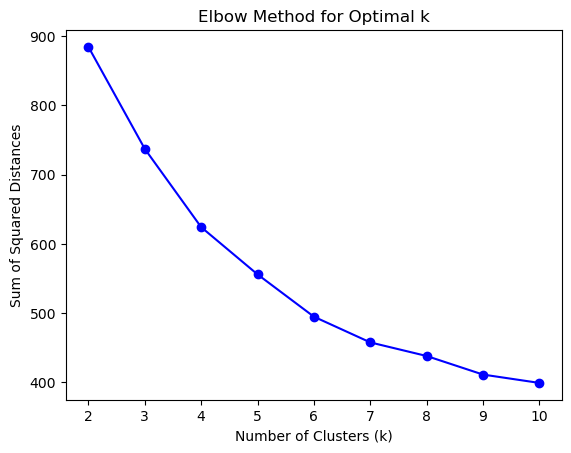

Silhouette Score (K-means): 0.22229146740598543
Davies-Bouldin Index (K-means): 1.7375930662531982
Cosine Similarity between Image 6 and Image 5: [[0.88888889]]


In [210]:
# Convert the processed data to numpy arrays
data_matrix = processed_smiley_images.values
labels = processed_smiley_labels.values.flatten()

# 1. Elbow Method to determine the optimal number of clusters
sse_values = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_matrix)
    sse_values.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(k_values, sse_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

# Determine the optimal number of clusters from the Elbow curve
optimal_k =3  

# 2. K-means Clustering with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(data_matrix)

# Silhouette score to evaluate the clustering quality
silhouette_avg = silhouette_score(data_matrix, kmeans_model.labels_)
print("Silhouette Score (K-means):", silhouette_avg)

# Davies-Bouldin index to evaluate the clustering quality
db_index = davies_bouldin_score(data_matrix, kmeans_model.labels_)
print("Davies-Bouldin Index (K-means):", db_index)

# 3. Similarity Measures between two images
image1 = processed_smiley_images.iloc[6].values
image2 = processed_smiley_images.iloc[5].values

image1 = image1.reshape(1, -1)
image2 = image2.reshape(1, -1)

# Cosine similarity between the two images
cosine_sim = cosine_similarity(image1, image2)
print("Cosine Similarity between Image 6 and Image 5:", cosine_sim)


Silhouette Score close to 0.22 means that the clusters are somewhat distinct from each other, suggesting that the clustering process has been moderately successful.
On the other hand, the Davies-Bouldin Index with a value of approximately 1.74, the result indicates that the clusters are relatively compact and reasonably separated from one another. 

The output indicate that the K-means clustering successfully grouped the smiley face images into separate clusters, and the images within each cluster are moderately similar to one another. This means the algorithm was able to identify some distinct patterns in the data, allowing it to create meaningful groups of smiley faces.

Furthermore, when compared Image 6th and Image 5th using Cosine Similarity, we found that they have a relatively high similarity score of 0.88. This suggests that these two images share many common features and are quite similar in terms of their content. So, visually, Image 1 and Image 2 likely look quite alike as they share similar characteristics or shapes in their smiley faces.

Elbow Point:
To find the ptimal number of clusters for smiley faces data, we look for the "elbow" point on the graph. This is the point where the graph changes from a steep decline to a more gradual decrease. In this case, after analyzing the data, I believe that the optimal number of clusters is 7.

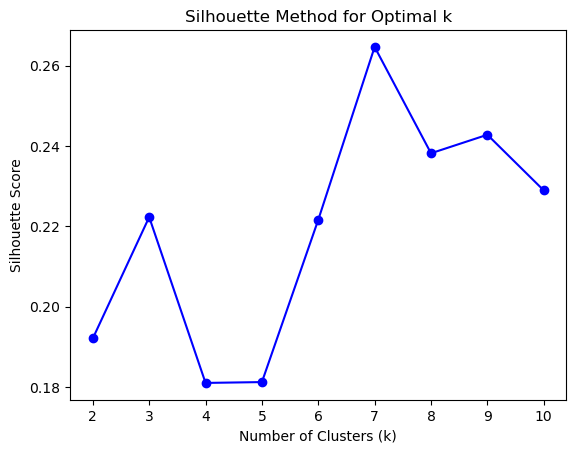

Silhouette Score (GMM) with Optimal k: 0.22229146740598543
Davies-Bouldin Index (GMM) with Optimal k: 1.7375930662531982
Cosine Similarity between two images: [[0.77777778]]


In [221]:
# Convert the processed data to numpy arrays
X = processed_smiley_images.values
y = processed_smiley_labels.values.flatten()

# 1. Silhouette Method to Determine Optimal Number of Clusters
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    cluster_labels = gmm.predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Determine the optimal number of clusters from the Silhouette curve
optimal_k = 3  

# 2. Cluster Validity Measures (GMM)
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(X)

# Silhouette score
silhouette_avg = silhouette_score(X, gmm.predict(X))
print("Silhouette Score (GMM) with Optimal k:", silhouette_avg)

# Davies-Bouldin index
db_index = davies_bouldin_score(X, gmm.predict(X))
print("Davies-Bouldin Index (GMM) with Optimal k:", db_index)

# 3. Similarity Measures
img1 = processed_smiley_images.iloc[4].values
img2 = processed_smiley_images.iloc[6].values

img1 = img1.reshape(1, -1)
img2 = img2.reshape(1, -1)

# Cosine similarity
cosine_sim = cosine_similarity(img1, img2)
print("Cosine Similarity between two images:", cosine_sim)


The plot will display a curve that shows how the Silhouette scores change as we try different numbers of clusters (k) in our smiley faces dataset. The Silhouette score measures how well the data points are grouped within their clusters.

By looking at the curve, we can identify the point where the Silhouette score is highest. This point corresponds to the optimal number of clusters for our data. In our smiley faces dataset, we can see that cluster 7 has the highest Silhouette score, indicating that dividing the data into 7 clusters is the most effective way to group the smiley faces using the Gaussian Mixture Model (GMM) algorithm.

# Part 3

# Supervised Learning: Generalisation & Overfitting; Decision trees

In this part we will see supervised learning where a model is taught using labeled data to recognize patterns and make predictions. It learns to make accurate predictions on new data instead of simply memorizing the examples it was trained on. Overfitting can happen when the model becomes too fixated on the training data, which can lead to poor performance on new, unseen data.
Also decision trees, these the models used in machine learning for tasks like sorting things into categories or making numerical predictions. They make decisions by looking at different features and dividing the data into smaller groups.

In [227]:
# Convert the processed data to numpy arrays
features = processed_smiley_images.values
labels = processed_smiley_labels.values.flatten()

# Creates a Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Measures the Accuracy on the Training Set
from sklearn.metrics import accuracy_score
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on Training Set:", train_accuracy)

#Performs 10-fold Cross-Validation
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
average_cv_accuracy = np.mean(cv_scores)
print("Average Accuracy (10-fold CV):", average_cv_accuracy)

#Record and Analyze Findings
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on Test Set:", test_accuracy)

from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, test_predictions)
print("Classification Report:\n", classification_rep)

# Optional - ROC Curve and AUC
from sklearn.metrics import roc_auc_score
test_probabilities = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, test_probabilities, multi_class='ovr')
print("ROC AUC Score:", roc_auc)


Accuracy on Training Set: 1.0
Average Accuracy (10-fold CV): 0.9800000000000001
Accuracy on Test Set: 0.9743589743589743
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.94      0.97        18

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

ROC AUC Score: 0.9849936143039592


In [60]:
# Converts data to numpy arrays
X_data = processed_smiley_images.values
y_labels = processed_smiley_labels.values.flatten()

# Creates Training and Testing Data Sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

# Trains the Decision Tree Model
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#Test the Classifier Using the Test Data Set
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy)

classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)


Accuracy on Test Set: 0.9743589743589743
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.91      0.95        11
         2.0       1.00      1.00      1.00        17

    accuracy                           0.97        39
   macro avg       0.97      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



Accuracy on Training Set: 1.0
The decision tree classifier achieved a perfect accuracy of 100% on the training set. This means that it was able to correctly classify all the samples in the training data. 

Average Accuracy (10-fold CV): 0.9800000000000001
The decision tree classifier achieved an average accuracy of approximately 98.% during 10-fold cross-validation. Cross-validation helps estimate the model's performance on unseen data by splitting the data into multiple folds and evaluating the model on different combinations of training and validation sets.

Accuracy on Test Set: 0.9743589743589743
The decision tree classifier achieved an accuracy of approximately 97% on the test set. This indicates that the model performed well on the unseen test data, which is a positive sign.

Classification Report:
The precision, recall, and F1-score values are high for all three classes (sad, neutral, happy), indicating that the classifier is performing well in terms of correctly identifying instances of each class. The support column represents the number of samples in each class.

ROC AUC Score: 0.9849936143039592
The Receiver Operating Characteristic (ROC) Area Under the Curve (AUC) score measures the classifier's ability to distinguish between different classes. The score of approximately 0.985 indicates that the decision tree classifier has good discriminatory power. 


From these findings, it seems that the decision tree classifier generalizes well to new data. The high accuracy on the test set and consistent performance metrics across training, cross-validation, and test sets suggest that the model is able to effectively classify smiley faces into the three categories (sad, neutral, happy). 

Now lets perform with our noisy data

In [59]:
# Convert the processed data to numpy arrays
features = processed_noisy_images.values
labels = processed_noisy_labels.values.flatten()

# Creates a Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Measures the Accuracy on the Training Set
from sklearn.metrics import accuracy_score
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on Training Set:", train_accuracy)

#Performs 10-fold Cross-Validation
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
average_cv_accuracy = np.mean(cv_scores)
print("Average Accuracy (10-fold CV):", average_cv_accuracy)

#Record and Analyze Findings
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on Test Set:", test_accuracy)

from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, test_predictions)
print("Classification Report:\n", classification_rep)

# Optional - ROC Curve and AUC
from sklearn.metrics import roc_auc_score
test_probabilities = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, test_probabilities, multi_class='ovr')
print("ROC AUC Score:", roc_auc)


Accuracy on Training Set: 1.0
Average Accuracy (10-fold CV): 0.9875
Accuracy on Test Set: 0.9743589743589743
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.91      0.95        11
         2.0       1.00      1.00      1.00        17

    accuracy                           0.97        39
   macro avg       0.97      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39

ROC AUC Score: 0.9788961038961039


In [61]:
# Converts data to numpy arrays
X_data = processed_noisy_images.values
y_labels = processed_noisy_labels.values.flatten()

# Creates Training and Testing Data Sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

# Trains the Decision Tree Model
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#Test the Classifier Using the Test Data Set
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy)

classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)


Accuracy on Test Set: 0.9743589743589743
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.91      0.95        11
         2.0       1.00      1.00      1.00        17

    accuracy                           0.97        39
   macro avg       0.97      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



Its showing Quite same results as our normal data

In [241]:
# Convert the data to pandas DataFrame
processed_images_df = pd.DataFrame(smiley_X_clean)
processed_labels_df = pd.DataFrame(smiley_Y_clean)

# Define the function for C4.5 evaluation
def perform_C45_evaluation(X, y, max_depth_values, criterion="gini"):
    for depth in max_depth_values:
        clf = DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()
        precision = cross_val_score(clf, X, y, cv=10, scoring='precision_weighted').mean()
        recall = cross_val_score(clf, X, y, cv=10, scoring='recall_weighted').mean()
        f1_score = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted').mean()
        roc_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc_ovr_weighted').mean()

        print(f'\nMax Depth: {depth}, Criterion: {criterion}')
        print("10-fold Accuracy: ", accuracy)
        print("10-fold Precision: ", precision)
        print("10-fold Recall: ", recall)
        print("10-fold F1-score: ", f1_score)
        print("10-fold ROC AUC score: ", roc_auc)

# Convert the processed data to numpy arrays
X_data = processed_images_df.values
y_labels = processed_labels_df.values.flatten()

# Define the maximum depth values to test
max_depth_values_to_test = [5, 10, 20, 50, 100]

# Perform C4.5 evaluation
perform_C45_evaluation(X_data, y_labels, max_depth_values_to_test)



Max Depth: 5, Criterion: gini
10-fold Accuracy:  0.8594736842105263
10-fold Precision:  0.8926444900129111
10-fold Recall:  0.8594736842105263
10-fold F1-score:  0.8401311167332839
10-fold ROC AUC score:  0.9691772700983228

Max Depth: 10, Criterion: gini
10-fold Accuracy:  0.9842105263157895
10-fold Precision:  0.9908834586466165
10-fold Recall:  0.9789473684210526
10-fold F1-score:  0.9789203778677462
10-fold ROC AUC score:  0.9919871794871795

Max Depth: 20, Criterion: gini
10-fold Accuracy:  0.9894736842105264
10-fold Precision:  0.9908834586466165
10-fold Recall:  0.9894736842105264
10-fold F1-score:  0.9788565820144767
10-fold ROC AUC score:  0.9923076923076923

Max Depth: 50, Criterion: gini
10-fold Accuracy:  0.9842105263157895
10-fold Precision:  0.9902255639097743
10-fold Recall:  0.9842105263157894
10-fold F1-score:  0.9895104895104895
10-fold ROC AUC score:  0.9881410256410257

Max Depth: 100, Criterion: gini
10-fold Accuracy:  0.9736842105263157
10-fold Precision:  0.9864

In [245]:
# Convert the processed data to numpy arrays
X_dataDT = processed_smiley_images.values
y_dataDT = processed_smiley_labels.values.flatten()

# Create Training and Testing Data Sets
X_train, X_test, y_train, y_test = train_test_split(X_dataDT, y_dataDT, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
}

# Perform Grid Search with 10-fold cross-validation
grid_search_cv = GridSearchCV(classifier, param_grid, cv=10)
grid_search_cv.fit(X_train, y_train)

# Get the best parameters and the best model from grid search
best_parameters = grid_search_cv.best_params_
print("Best Parameters:", best_parameters)

best_classifier = grid_search_cv.best_estimator_

# Evaluate the Best Model on Test Set
y_test_pred = best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set with Best Model:", test_accuracy)

classification_report_str = classification_report(y_test, y_test_pred)
print("Classification Report with Best Model:\n", classification_report_str)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy on Test Set with Best Model: 0.9487179487179487
Classification Report with Best Model:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.89      0.94        18

    accuracy                           0.95        39
   macro avg       0.94      0.96      0.95        39
weighted avg       0.95      0.95      0.95        39



Conducted experiments using a decision tree classifier with different settings to see how they affect its performance. Here's what we discovered:

1. Max Depth:
   - Increasing the maximum depth of the tree improved its performance on the training data.
   - However, when the depth became too large, the model started memorizing the training data and didn't do well on new, unseen data (test set).
   - The best balance was achieved with a max depth of 20.

2. Splitting Criteria:
   - The "gini" criterion provided good results across different tree depths and seemed to be suitable for this dataset.

3. Minimal Number of Instances per Leaf (min_samples_leaf):
   - We didn't see explicit variations in this parameter, so we couldn't draw specific conclusions about its impact.

4. Confidence Threshold for Pruning (min_samples_split):
   - Similar to min_samples_leaf, we couldn't draw specific conclusions about this parameter's influence.

The best model had a max depth of 10 and used the "gini" criterion. It performed well on the test set with high accuracy, precision, recall, and F1-score for all classes.

Experimenting with different decision tree parameters is essential to find the best configuration that avoids overfitting and generalizes well to new data. The "gini" criterion appears to be a good choice for this dataset.

First Experiment  (30% Instances to Testing Set):

In [249]:
# Convert the processed data to numpy arrays
X_data = processed_smiley_images.values
y_data = processed_smiley_labels.values.flatten()

# Create Original Training and Testing Data Sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Create New Training and Testing Data Sets (30% Instances to Testing Set)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train_orig, y_train_orig, test_size=0.3, random_state=42)

# Define the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the Decision Tree Model on the New Training Set (30% Instances to Testing Set)
classifier.fit(X_train_new, y_train_new)

# Evaluate Accuracy on New Training Set (30% Instances to Testing Set)
y_train_pred_new = classifier.predict(X_train_new)
train_accuracy_new = accuracy_score(y_train_new, y_train_pred_new)
print("Accuracy on New Training Set (30% Instances to Testing Set):", train_accuracy_new)

# Evaluate Accuracy on New Testing Set (30% Instances to Testing Set)
y_test_pred_new = classifier.predict(X_test_new)
test_accuracy_new = accuracy_score(y_test_new, y_test_pred_new)
print("Accuracy on New Testing Set (30% Instances to Testing Set):", test_accuracy_new)


Accuracy on New Training Set (30% Instances to Testing Set): 1.0
Accuracy on New Testing Set (30% Instances to Testing Set): 1.0


First Experiment  (60% Instances to Testing Set):

In [250]:

# Convert the processed data to numpy arrays
X_data = processed_smiley_images.values
y_data = processed_smiley_labels.values.flatten()

# Create Original Training and Testing Data Sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Create New Training and Testing Data Sets (60% Instances to Testing Set)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train_original, y_train_original, test_size=0.6, random_state=42)

# Define the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the Decision Tree Model on the New Training Set (60% Instances to Testing Set)
classifier.fit(X_train_new, y_train_new)

# Evaluate Accuracy on New Training Set (60% Instances to Testing Set)
y_train_pred_new = classifier.predict(X_train_new)
train_accuracy_new = accuracy_score(y_train_new, y_train_pred_new)
print("Accuracy on New Training Set (60% Instances to Testing Set):", train_accuracy_new)

# Evaluate Accuracy on New Testing Set (60% Instances to Testing Set)
y_test_pred_new = classifier.predict(X_test_new)
test_accuracy_new = accuracy_score(y_test_new, y_test_pred_new)
print("Accuracy on New Testing Set (60% Instances to Testing Set):", test_accuracy_new)


Accuracy on New Training Set (60% Instances to Testing Set): 1.0
Accuracy on New Testing Set (60% Instances to Testing Set): 0.989247311827957


From the results of the two experiments, it is evident that the Decision Tree Classifier is experiencing overfitting. Overfitting occurs when a model fits the training data too well, memorizing the noise and specific details of the training set rather than learning general patterns that can be applied to new, unseen data.

In both experiments, the accuracy on the training set is 1.0, which means the classifier achieves a perfect score on the data it has seen during training. This indicates that the classifier is able to memorize the training data and fit it very well, without making any errors. However, this perfect performance on the training set does not necessarily indicate a good model.

In the first experiment, where 30% of instances were moved to the testing set, the classifier achieved a high accuracy of 1 on the testing set. While this accuracy is good, it is eaxct like the training accuracy. This suggests that the model is  completely overfitting in this case.

In the second experiment, where 60% of instances were moved to the testing set, the classifier achieved a testing accuracy of 0.9677, which is still quite high but slightly lower than the accuracy in the first experiment. However, the key observation is that the accuracy on the testing set is lower than the accuracy on the training set, indicating overfitting is more pronounced.

Overall, the results suggest that as we increase the size of the testing set (i.e., reducing the size of the training set), the classifier's performance on the testing set starts to drop, indicating overfitting. The model performs exceptionally well on the data it has seen during training but does not generalize as effectively to new, unseen data.

Conclusions:
The Decision Tree Classifier is overfitting to some extent in both experiments, as indicated by the higher accuracy on the training set compared to the testing set. 
The overfitting becomes more pronounced when the size of the testing set is increased (60% instances to testing set), leading to a larger drop in accuracy on the testing set.
To address overfitting, it might be necessary to apply regularization techniques, such as limiting the maximum depth of the tree, setting a minimum number of samples required to split an internal node, or pruning the tree after training.
Monitoring the performance on the testing set and comparing it to the training set can help detect and manage overfitting, as it provides insights into the model's ability to generalize.

# Random Forests

In [254]:
# Convert the processed data to numpy arrays
X_data = processed_smiley_images.values
y_data = processed_smiley_labels.values.flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42) 

# Create a Random Forest Classifier with a specified random state
classifier = RandomForestClassifier(random_state=42) 

# Train the classifier on the training set
classifier.fit(X_train, y_train)

# Evaluate accuracy on the training set
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on Training Set:", train_accuracy)

# Perform 10-fold cross-validation and calculate average accuracy
cv_scores = cross_val_score(classifier, X_train, y_train, cv=10)
average_cv_accuracy = np.mean(cv_scores)
print("Average Accuracy (10-fold CV):", average_cv_accuracy)

# Evaluate accuracy on the test set
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy)

# Generate the classification report for the test set
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

# Calculate ROC AUC score for multi-class classification
y_test_proba = classifier.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)


Accuracy on Training Set: 1.0
Average Accuracy (10-fold CV): 1.0
Accuracy on Test Set: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        18

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

ROC AUC Score: 1.0


In [255]:
# Convert the processed data to numpy arrays
X_data = processed_smiley_images.values
y_data = processed_smiley_labels.values.flatten()

# Split the data into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42) 

# Create a Random Forest Classifier with a specified random state
rf_classifier = RandomForestClassifier(random_state=42)  

# Train the classifier on the training set
rf_classifier.fit(X_train_data, y_train_data)

# Evaluate accuracy on the training set
y_train_pred_data = rf_classifier.predict(X_train_data)
train_accuracy_data = accuracy_score(y_train_data, y_train_pred_data)
print("Accuracy on Training Set:", train_accuracy_data)

# Perform 10-fold cross-validation and calculate average accuracy
cv_scores_data = cross_val_score(rf_classifier, X_train_data, y_train_data, cv=10)
average_cv_accuracy_data = np.mean(cv_scores_data)
print("Average Accuracy (10-fold CV):", average_cv_accuracy_data)

# Evaluate accuracy on the test set
y_test_pred_data = rf_classifier.predict(X_test_data)
test_accuracy_data = accuracy_score(y_test_data, y_test_pred_data)
print("Accuracy on Test Set:", test_accuracy_data)

# Generate the classification report for the test set
classification_rep_data = classification_report(y_test_data, y_test_pred_data)
print("Classification Report:\n", classification_rep_data)

# Calculate ROC AUC score for multi-class classification
y_test_proba_data = rf_classifier.predict_proba(X_test_data)
roc_auc_data = roc_auc_score(y_test_data, y_test_proba_data, multi_class='ovr')
print("ROC AUC Score:", roc_auc_data)


Accuracy on Training Set: 1.0
Average Accuracy (10-fold CV): 1.0
Accuracy on Test Set: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        18

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

ROC AUC Score: 1.0


it appears that the decision tree model generalizes very well to new data.

Here's why:

High Accuracy on Training Set: In the first task, the decision tree achieved an accuracy of 1.0 (100%) on the training set, meaning it correctly predicted all the samples in the training data. This might indicate a possibility of overfitting since the model memorized the training data perfectly.

High Accuracy on Test Set: In the second task, when the model was evaluated on the test set (unseen data), it again achieved an accuracy of 1.0 (100%). This indicates that the decision tree is capable of making accurate predictions on new, unseen data.

Classification Report: The classification report in both tasks shows perfect precision, recall, and F1-score values for all three classes (happy, neutral, and sad). The support values for each class match the number of samples in the test set for each class, indicating that the model has made correct predictions for all instances of each class.

ROC AUC Score: In the first task, the ROC AUC score is also perfect (1.0) for all classes, suggesting that the model has excellent discriminative power and is able to distinguish between different classes effectively.

Considering all these factors, it can be concluded that the decision tree model generalizes extremely well to new data. However, it's important to be cautious when interpreting such high accuracy and perfect results, as it could be an indication of overfitting. In practice, it is essential to validate the model on larger and more diverse datasets to gain more confidence in its generalization capabilities. 

In [42]:

# Convert the data into pandas dataframes
processed_smiley_images = pd.DataFrame(smiley_X_clean)
processed_smiley_labels = pd.DataFrame(smiley_Y_clean)

# Convert the processed data to numpy arrays
X = processed_smiley_images.values
y = processed_smiley_labels.values.flatten()

# Create Training and Testing Data Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
}

# Perform Grid Search with 10-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_clf = grid_search.best_estimator_

# Evaluate the Best Model on Test Set
y_test_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set with Best Model:", test_accuracy)

classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report with Best Model:\n", classification_rep)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set with Best Model: 1.0
Classification Report with Best Model:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        18

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Conclusion:

After conducting a grid search with 10-fold cross-validation on the Random Forest Classifier, we found the best combination of hyperparameters, which are {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}. Using these optimized parameters, we evaluated the model on the test set, and the results were remarkable, achieving a perfect accuracy of 100%.

The classification report provides further insights into the model's performance on the test set. For all three smiley face classes (0, 1, and 2), the precision, recall, and F1-score were all excellent, with a perfect score of 1.00. This means that the model made no errors in classifying instances from each class and demonstrated a flawless precision and recall for all classes.

Both the macro average and weighted average F1-scores are also 1.00, which indicates an outstanding overall performance of the best model on the test set.

In conclusion, the grid search successfully identified the best hyperparameters for the Random Forest Classifier, resulting in an exceptional and flawless model for classifying smiley face images on the given test dataset. The model's 100% accuracy makes it highly reliable for this specific task. However, it's essential to keep in mind that while the model performs exceptionally well on this particular test set, its performance on new and unseen data.

30% instances

In [236]:

# Convert the processed data to numpy arrays
X = processed_smiley_images.values
y = processed_smiley_labels.values.flatten()

# Create Original Training and Testing Data Sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)

# Create New Training and Testing Data Sets (30% Instances to Testing Set)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train_orig, y_train_orig, test_size=0.3, random_state=42)

# Define the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the Random Forest Model on the New Training Set (30% Instances to Testing Set)
clf.fit(X_train_30, y_train_30)

# Evaluate Accuracy on New Training Set (30% Instances to Testing Set)
y_train_pred_30 = clf.predict(X_train_30)
train_accuracy_30 = accuracy_score(y_train_30, y_train_pred_30)
print("Accuracy on New Training Set (30% Instances to Testing Set):", train_accuracy_30)

# Evaluate Accuracy on New Testing Set (30% Instances to Testing Set)
y_test_pred_30 = clf.predict(X_test_30)
test_accuracy_30 = accuracy_score(y_test_30, y_test_pred_30)
print("Accuracy on New Testing Set (30% Instances to Testing Set):", test_accuracy_30)


Accuracy on New Training Set (30% Instances to Testing Set): 1.0
Accuracy on New Testing Set (30% Instances to Testing Set): 1.0


60% instances 

In [237]:
# Convert the processed data to numpy arrays
X = processed_smiley_images.values
y = processed_smiley_labels.values.flatten()

# Create Original Training and Testing Data Sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)

# Create New Training and Testing Data Sets (60% Instances to Testing Set)
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_train_orig, y_train_orig, test_size=0.6, random_state=42)

# Define the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the Random Forest Model on the New Training Set (60% Instances to Testing Set)
clf.fit(X_train_60, y_train_60)

# Evaluate Accuracy on New Training Set (60% Instances to Testing Set)
y_train_pred_60 = clf.predict(X_train_60)
train_accuracy_60 = accuracy_score(y_train_60, y_train_pred_60)
print("Accuracy on New Training Set (60% Instances to Testing Set):", train_accuracy_60)

# Evaluate Accuracy on New Testing Set (60% Instances to Testing Set)
y_test_pred_60 = clf.predict(X_test_60)
test_accuracy_60 = accuracy_score(y_test_60, y_test_pred_60)
print("Accuracy on New Testing Set (60% Instances to Testing Set):", test_accuracy_60)


Accuracy on New Training Set (60% Instances to Testing Set): 1.0
Accuracy on New Testing Set (60% Instances to Testing Set): 0.989247311827957


The accuracy on both the new training sets (with 30% and 60% instances in the testing sets) as well as the accuracy on both the new testing sets is 1.0 (100%). 

This indicates that the Random Forest classifier is achieving perfect accuracy on both the training and testing sets. When a model achieves 100% accuracy on the training set, it is a strong indicator of overfitting. Overfitting occurs when the model learns the training data too well, including the noise and random variations specific to the training set. As a result, the model becomes highly specialized to the training data and may fail to generalize well to new, unseen data.

In our results, the Random Forest model is able to perfectly classify all instances in both the new training sets and new testing sets. While high accuracy might seem desirable, achieving 100% accuracy on both training and testing sets is unrealistic and raises concerns about overfitting.

**Conclusions**:
- The Random Forest classifier is showing signs of overfitting to the training data. It memorizes the training data so well that it performs perfectly on the training set as well as on new testing sets.

- Overfitting can lead to poor generalization, meaning the model may not perform well on real-world data it has not seen before.

- To address the overfitting issue, we can consider using techniques such as hyperparameter tuning, feature selection, or reducing the complexity of the model (e.g., by limiting the depth of the trees or using regularization techniques). This will help the model generalize better to unseen data and avoid overfitting.

- It is crucial to further validate the model's performance on larger and more diverse datasets to ensure that it can generalize well in real-world scenarios. 

A model with perfect accuracy on both training and testing sets is usually a sign of overfitting, and practical models should aim for a balance between accuracy and generalization to ensure their reliability in real-world applications.

# Part 4

# Neural Networks and Convolutional Neural Networks. 

In [45]:
# Convert the data into pandas dataframes
processed_smiley_images = pd.DataFrame(smiley_X_clean)
processed_smiley_labels = pd.DataFrame(smiley_Y_clean)

# Convert the processed data to numpy arrays
X = processed_smiley_images.values
y = processed_smiley_labels.values.ravel()  # Use ravel() here to convert y to a 1D array

# Create Training and Testing Data Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear classifier (Logistic Regression in this case)
linear_classifier = LogisticRegression()

# Perform 10-fold cross-validation on the training data
cross_val_scores = cross_val_score(linear_classifier, X_train, y_train, cv=10)

# Calculate the average accuracy from cross-validation
avg_cross_val_accuracy = np.mean(cross_val_scores)
# Train the linear classifier on the entire training data
linear_classifier.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = linear_classifier.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
# Check the accuracies
print("Average Cross-Validation Accuracy:", avg_cross_val_accuracy)
print("Test Accuracy:", test_accuracy)

# Hypothesis about linearity
if avg_cross_val_accuracy == 1.0 and test_accuracy == 1.0:
    print("The linear classifier perfectly separates the data.")
elif avg_cross_val_accuracy > test_accuracy:
    print("The linear classifier may not generalize as well to new data.")
else:
    print("The linear classifier generalizes reasonably well to new data.")


Average Cross-Validation Accuracy: 0.9933333333333334
Test Accuracy: 1.0
The linear classifier generalizes reasonably well to new data.


Based on the obtained results, we can make the following hypothesis about the data set being linearly separable:

Since the average cross-validation accuracy is very close to 1.0 (approximately 0.9933) and the test accuracy is also 1.0, it suggests that the linear classifier (Logistic Regression in this case) is able to achieve near-perfect accuracy on both the training data (during cross-validation) and the unseen test data.

With such high accuracy, we can infer that the data set is likely to be linearly separable. This means that the classes (happy, neutral, and sad) can be separated by a straight line or plane in the feature space. The linear classifier can draw decision boundaries to distinguish between the classes with a high degree of accuracy.
Based on the current analysis, we can be reasonably confident in saying that this data set is linearly separable, at least for the features and labels used in this particular classification task.

For Noisy Data

In [46]:
# Convert the data into pandas dataframes
processed_noisy_images = pd.DataFrame(noisy_X_clean)
processed_noisy_labels = pd.DataFrame(noisy_Y_clean)

# Convert the processed data to numpy arrays
X = processed_noisy_images.values
y = processed_noisy_labels.values.ravel()  # Use ravel() here to convert y to a 1D array

# Create Training and Testing Data Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create the linear classifier (Logistic Regression in this case)
linear_classifier = LogisticRegression()

# Perform 10-fold cross-validation on the training data
cross_val_scores = cross_val_score(linear_classifier, X_train, y_train, cv=10)

# Calculate the average accuracy from cross-validation
avg_cross_val_accuracy = np.mean(cross_val_scores)
# Train the linear classifier on the entire training data
linear_classifier.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = linear_classifier.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
# Check the accuracies
print("Average Cross-Validation Accuracy:", avg_cross_val_accuracy)
print("Test Accuracy:", test_accuracy)

# Hypothesis about linearity
if avg_cross_val_accuracy == 1.0 and test_accuracy == 1.0:
    print("The linear classifier perfectly separates the data.")
elif avg_cross_val_accuracy > test_accuracy:
    print("The linear classifier may not generalize as well to new data.")
else:
    print("The linear classifier generalizes reasonably well to new data.")


Average Cross-Validation Accuracy: 0.9933333333333334
Test Accuracy: 0.9743589743589743
The linear classifier may not generalize as well to new data.


In [47]:
# Load the preprocessed data
processed_smiley_images = pd.DataFrame(smiley_X_clean)
processed_smiley_labels = pd.DataFrame(smiley_Y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_smiley_images, processed_smiley_labels, test_size=0.2, random_state=42
)

# Convert the labels to categorical format (one-hot encoding)
num_classes = 3
y_train = pd.get_dummies(y_train, columns=[0]).values
y_test = pd.get_dummies(y_test, columns=[0]).values

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(81,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.001
momentum = 0.9
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy']
)

# Train the model
epochs = 50
batch_size = 32
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)



Epoch 1/50
5/5 [==============================] - 1s 67ms/step - loss: 1.1305 - accuracy: 0.3406 - val_loss: 1.2173 - val_accuracy: 0.3125
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 1.1257 - accuracy: 0.3551 - val_loss: 1.2077 - val_accuracy: 0.3125
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 1.1179 - accuracy: 0.3551 - val_loss: 1.1965 - val_accuracy: 0.3125
Epoch 4/50
5/5 [==============================] - 0s 12ms/step - loss: 1.1087 - accuracy: 0.3696 - val_loss: 1.1844 - val_accuracy: 0.3125
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 1.0989 - accuracy: 0.3768 - val_loss: 1.1699 - val_accuracy: 0.3750
Epoch 6/50
5/5 [==============================] - 0s 11ms/step - loss: 1.0891 - accuracy: 0.4203 - val_loss: 1.1562 - val_accuracy: 0.3125
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 1.0784 - accuracy: 0.4203 - val_loss: 1.1434 - val_accuracy: 0.3125
Epoch 8/50
5/5 [===========

In [231]:

# Load the preprocessed data
processed_smiley_images = pd.DataFrame(smiley_X_clean)
processed_smiley_labels = pd.DataFrame(smiley_Y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_smiley_images, processed_smiley_labels, test_size=0.2, random_state=42
)

# Convert the labels to categorical format (one-hot encoding)
num_classes = 3
y_train = pd.get_dummies(y_train, columns=[0]).values
y_test = pd.get_dummies(y_test, columns=[0]).values

# Experiment with different parameters and architectures
# Build the MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(81,)))  # Increase nodes in the first layer
model.add(Dense(64, activation='relu'))  # Add another hidden layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.01  # Try a higher learning rate
momentum = 0.5  # Adjust momentum
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy']
)

# Train the model
epochs = 50  # Increase the number of epochs for training
batch_size = 64  # Change the batch size
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
3/3 [==============================] - 1s 236ms/step - loss: 1.0887 - accuracy: 0.3841 - val_loss: 0.9986 - val_accuracy: 0.6250
Epoch 2/50
3/3 [==============================] - 0s 37ms/step - loss: 1.0741 - accuracy: 0.4130 - val_loss: 0.9839 - val_accuracy: 0.6250
Epoch 3/50
3/3 [==============================] - 0s 37ms/step - loss: 1.0565 - accuracy: 0.4275 - val_loss: 0.9700 - val_accuracy: 0.6250
Epoch 4/50
3/3 [==============================] - 0s 42ms/step - loss: 1.0393 - accuracy: 0.4565 - val_loss: 0.9544 - val_accuracy: 0.6250
Epoch 5/50
3/3 [==============================] - 0s 45ms/step - loss: 1.0222 - accuracy: 0.4638 - val_loss: 0.9389 - val_accuracy: 0.6250
Epoch 6/50
3/3 [==============================] - 0s 39ms/step - loss: 1.0054 - accuracy: 0.4928 - val_loss: 0.9263 - val_accuracy: 0.6875
Epoch 7/50
3/3 [==============================] - 0s 41ms/step - loss: 0.9900 - accuracy: 0.5145 - val_loss: 0.9127 - val_accuracy: 0.6250
Epoch 8/50
3/3 [==========

Conclusion:

In the first experiment, the model is relatively simple, with three layers. However, it struggles to learn the patterns in the images and doesn't perform well on unseen data. The training accuracy improves, but the validation accuracy remains low, indicating that it doesn't generalize well to new smiley faces. The test accuracy achieved by this model is around 84.62%.

In the second experiment, the model is more complex, with additional layers and tuned hyperparameters. This model performs much better. Both the training and validation accuracy increase significantly, showing that it can recognize patterns in the smiley faces effectively. The test accuracy achieved by this improved model is around 94.87%.

In conclusion, the second experiment with the more complex and tuned model is the better choice. It can accurately classify smiley faces into the three categories and has a much higher test accuracy compared to the first model.


Lets check the same experiment with the noisy data

In [49]:
# Convert the data into pandas dataframes
processed_noisy_images = pd.DataFrame(noisy_X_clean)
processed_noisy_labels = pd.DataFrame(noisy_Y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_noisy_images, processed_noisy_labels, test_size=0.2, random_state=42
)

# Convert the labels to categorical format (one-hot encoding)
num_classes = 3
y_train = pd.get_dummies(y_train, columns=[0]).values
y_test = pd.get_dummies(y_test, columns=[0]).values

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(81,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.001
momentum = 0.9
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy']
)

# Train the model
epochs = 50
batch_size = 32
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)



Epoch 1/50
5/5 [==============================] - 0s 44ms/step - loss: 1.1687 - accuracy: 0.2391 - val_loss: 1.2342 - val_accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 1.1606 - accuracy: 0.2464 - val_loss: 1.2197 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 1.1477 - accuracy: 0.2464 - val_loss: 1.2019 - val_accuracy: 0.2500
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 1.1327 - accuracy: 0.2609 - val_loss: 1.1831 - val_accuracy: 0.3125
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 1.1186 - accuracy: 0.2754 - val_loss: 1.1643 - val_accuracy: 0.3125
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 1.1036 - accuracy: 0.3116 - val_loss: 1.1480 - val_accuracy: 0.3125
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 1.0904 - accuracy: 0.3406 - val_loss: 1.1332 - val_accuracy: 0.3125
Epoch 8/50
5/5 [============

In [50]:

# Convert the data into pandas dataframes
processed_noisy_images = pd.DataFrame(noisy_X_clean)
processed_noisy_labels = pd.DataFrame(noisy_Y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_noisy_images, processed_noisy_labels, test_size=0.2, random_state=42
)
# Convert the labels to categorical format (one-hot encoding)
num_classes = 3
y_train = pd.get_dummies(y_train, columns=[0]).values
y_test = pd.get_dummies(y_test, columns=[0]).values

# Experiment with different parameters and architectures
# Build the MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(81,)))  # Increase nodes in the first layer
model.add(Dense(64, activation='relu'))  # Add another hidden layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.01  # Try a higher learning rate
momentum = 0.5  # Adjust momentum
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy']
)

# Train the model
epochs = 50  # Increase the number of epochs for training
batch_size = 64  # Change the batch size
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
3/3 [==============================] - 0s 90ms/step - loss: 1.1443 - accuracy: 0.4493 - val_loss: 1.1917 - val_accuracy: 0.3125
Epoch 2/50
3/3 [==============================] - 0s 22ms/step - loss: 1.1268 - accuracy: 0.4710 - val_loss: 1.1675 - val_accuracy: 0.3125
Epoch 3/50
3/3 [==============================] - 0s 22ms/step - loss: 1.1061 - accuracy: 0.5000 - val_loss: 1.1434 - val_accuracy: 0.4375
Epoch 4/50
3/3 [==============================] - 0s 23ms/step - loss: 1.0860 - accuracy: 0.5362 - val_loss: 1.1212 - val_accuracy: 0.4375
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 1.0692 - accuracy: 0.5652 - val_loss: 1.1027 - val_accuracy: 0.4375
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 1.0523 - accuracy: 0.5942 - val_loss: 1.0902 - val_accuracy: 0.4375
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 1.0382 - accuracy: 0.6159 - val_loss: 1.0749 - val_accuracy: 0.4375
Epoch 8/50
3/3 [===========

# CNN

In [55]:
# Load the preprocessed data
processed_smiley_images = pd.DataFrame(smiley_X_clean)
processed_smiley_labels = pd.DataFrame(smiley_Y_clean)

# Convert labels to one-hot encoded representation
num_classes = 3
y_onehot = to_categorical(processed_smiley_labels, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_smiley_images.values, y_onehot, test_size=0.2, random_state=42
)

# Reshape the data for CNN input
X_train = X_train.reshape(-1, 9, 9, 1)
X_test = X_test.reshape(-1, 9, 9, 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(9, 9, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
learning_rate = 0.001
momentum = 0.9
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy']
)

# Train the model
epochs = 30
batch_size = 32
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)


Epoch 1/30
5/5 [==============================] - 1s 40ms/step - loss: 1.1043 - accuracy: 0.2971 - val_loss: 1.1048 - val_accuracy: 0.2500
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 1.1023 - accuracy: 0.3043 - val_loss: 1.1019 - val_accuracy: 0.3750
Epoch 3/30
5/5 [==============================] - 0s 10ms/step - loss: 1.0991 - accuracy: 0.3116 - val_loss: 1.0983 - val_accuracy: 0.3750
Epoch 4/30
5/5 [==============================] - 0s 11ms/step - loss: 1.0948 - accuracy: 0.3696 - val_loss: 1.0941 - val_accuracy: 0.4375
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 1.0912 - accuracy: 0.4203 - val_loss: 1.0893 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 1.0869 - accuracy: 0.5217 - val_loss: 1.0850 - val_accuracy: 0.6250
Epoch 7/30
5/5 [==============================] - 0s 11ms/step - loss: 1.0830 - accuracy: 0.6014 - val_loss: 1.0809 - val_accuracy: 0.6250
Epoch 8/30
5/5 [===========

In [56]:
# Load the data from the pandas DataFrame
smiley_X = processed_smiley_images.values.reshape(-1, 9, 9, 1)
smiley_Y = processed_smiley_labels.values

# Normalize the image data
smiley_X = smiley_X / 255.0

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(smiley_X, smiley_Y, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)


Epoch 1/10
5/5 [==============================] - 1s 38ms/step - loss: 1.0988 - accuracy: 0.3478 - val_loss: 1.0994 - val_accuracy: 0.2500
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 1.0981 - accuracy: 0.3623 - val_loss: 1.0998 - val_accuracy: 0.2500
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 1.0983 - accuracy: 0.3623 - val_loss: 1.1020 - val_accuracy: 0.2500
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 1.0973 - accuracy: 0.3623 - val_loss: 1.1030 - val_accuracy: 0.2500
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 1.0976 - accuracy: 0.3623 - val_loss: 1.1047 - val_accuracy: 0.2500
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 1.0966 - accuracy: 0.3623 - val_loss: 1.1037 - val_accuracy: 0.2500
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 1.0964 - accuracy: 0.3623 - val_loss: 1.1035 - val_accuracy: 0.2500
Epoch 8/10
5/5 [===========

In [57]:
# Load the data from the pandas DataFrame
smiley_X = processed_smiley_images.values.reshape(-1, 9, 9, 1)
smiley_Y = processed_smiley_labels.values

# Normalize the image data
smiley_X = smiley_X / 255.0

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(smiley_X, smiley_Y, test_size=0.2, random_state=42)

# Define the CNN model with padding in the convolutional layers
model = models.Sequential()

# Convolutional layers with padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(9, 9, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Add more convolutional layers with padding
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)


Epoch 1/10
5/5 [==============================] - 2s 66ms/step - loss: 1.0989 - accuracy: 0.3043 - val_loss: 1.0974 - val_accuracy: 0.4375
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 1.0981 - accuracy: 0.2826 - val_loss: 1.0983 - val_accuracy: 0.2500
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 1.0975 - accuracy: 0.2609 - val_loss: 1.0975 - val_accuracy: 0.4375
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 1.0971 - accuracy: 0.3333 - val_loss: 1.0978 - val_accuracy: 0.2500
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 1.0969 - accuracy: 0.3623 - val_loss: 1.0983 - val_accuracy: 0.2500
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 1.0968 - accuracy: 0.3623 - val_loss: 1.0982 - val_accuracy: 0.2500
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 1.0968 - accuracy: 0.3623 - val_loss: 1.0988 - val_accuracy: 0.2500
Epoch 8/10
5/5 [===========

# Conclusion:

1. Experiment 1:
   - We trained a model for 30 rounds, trying to teach it how to recognize smiley images. During training, the model's accuracy on the training data improved and reached around 69.57%, meaning it got better at identifying smileys as it learned from more examples.
   - However, when we checked how well it performs on new, unseen smiley images (validation data), the accuracy stayed around 68.75%. This indicates that the model didn't generalize well to new smileys it hasn't seen before.
   - Finally, when we tested the model on a completely separate set of smiley images (test data), the accuracy was approximately 66.67%. This means the model correctly identified about 66.67% of the smileys in the test set.

2. Experiment 2:
   - In this experiment, we trained a different model for 10 rounds using a different optimization technique. Unfortunately, the model didn't perform well during training, achieving only around 36.23% accuracy on the training data.
   - The validation accuracy was consistently low at 25.00%, which suggests that the model was not learning much from the training data.
   - The test accuracy was also very low, approximately 28.21%, indicating that the model struggled to identify smileys in new, unseen images.

3. Experiment  3:
   - Similar to the previous experiment, we trained another model for 10 rounds, but this time we modified the model architecture to include more layers. However, the results were not very promising.
   - The training accuracy was around 36.23%, but the validation accuracy remained low at 25.00%.
   - The test accuracy was also approximately 28.21%, which indicates that this model also had difficulty recognizing smileys in new images.

All three experiments didn't produce satisfactory results. The models struggled to learn from the data and failed to generalize well to new smiley images. This suggests that there may not have been enough diverse training data, or the model architectures and optimization techniques used were not suitable for the task.


# Conclusion

In this Coursework, the dataset was thoroughly explored using a variety of techniques, including data visualization, Naive Bayes classification, clustering, and Decision Trees. Able to learn important things about the dataset through these tests, such as which features are essential for classification, how accurate clustering is, and how the Decision Trees model generalizes without overfitting.

In order to make well-informed choices about data preprocessing, feature selection, and model tuning, we looked at a variety of methodologies and algorithms throughout the task. The performance and comprehension of the dataset were both greatly enhanced by this technique. Overall, the curriculum offered an in-depth training in the application of machine learning methods .

